In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import cv2
import os
import glob


def get_processed_image(image_path, process_name):
    return cv2.imread(f"./output/{process_name}/{os.path.basename(image_path)}", cv2.IMREAD_GRAYSCALE)



# Create image dict
We need to create an image dict, with the image name as the key, and the value being a dict with the following keys:
raw_image: the original image
thresholded: the thresholded image
contours: the contours image
overlay: the overlay image
peak_trough: the peak and trough image

Image shape: 106x62
Image shape: 106x62


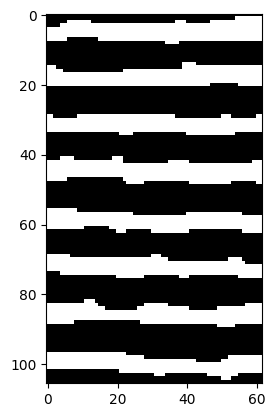

In [2]:

# get a list of the images in our output folder. They will all have the same filename, 
# but the different processed images will be in different folders
images = glob.glob(f"./output/strips/*.png")

contour_image_0 = get_processed_image(images[0], "contours")
overlay_image_0 = get_processed_image(images[0], "overlay")


# get the shape of the image
height, width = contour_image_0.shape
print(f"Image shape: {height}x{width}")

height, width = overlay_image_0.shape
print(f"Image shape: {height}x{width}")

# display the image
plt.imshow(contour_image_0, cmap='gray')

Average distance between peaks: 13.571428571428571
Peak widths: [5.26716141 5.16276803 4.81883117 5.55555556 4.99821429 4.95086207
 5.09356725 4.81149425]
Left bases: [ 2.18181818 15.26315789 28.88571429 42.         56.6875     69.72413793
 83.22222222 97.53333333]
Right bases: [  7.44897959  20.42592593  33.70454545  47.55555556  61.68571429
  74.675       88.31578947 102.34482759]


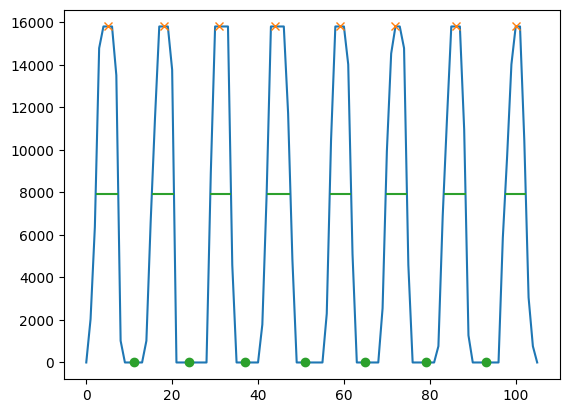

In [3]:

chosen_height = 0.5

    # Lets look at the image as a histogram of where the pixels are in the y axis
# we can use numpy.sum to sum the pixels in the x axis
# and then plot that as a histogram
histogram = numpy.sum(contour_image_0, axis=1)

plt.plot(histogram)

# can we find the peaks in the histogram?
# we can use the find_peaks function from scipy
from scipy.signal import find_peaks

peaks, _ = find_peaks(histogram, height=1000)
plt.plot(peaks, histogram[peaks], "x")

# what about the average distance between the peaks?
peak_distances = numpy.diff(peaks)
print(f"Average distance between peaks: {numpy.mean(peak_distances)}")

# get the half-way point between the peaks
halfway_points = peaks[:-1] + peak_distances // 2
plt.plot(halfway_points, histogram[halfway_points], "o")

# how about the full-width at half-maximum?
# we can use the peak_widths function from scipy
from scipy.signal import peak_widths


results = peak_widths(histogram, peaks, rel_height=chosen_height)
plt.hlines(*results[1:], color="C2")

# What does the results variable contain?
print(f"Peak widths: {results[0]}")
print(f"Left bases: {results[2]}")
print(f"Right bases: {results[3]}") 


plt.show()



In [4]:
# distance between each peak
peak_distances = numpy.diff(peaks)
print(f"Average distance between peaks: {numpy.mean(peak_distances)}")

Average distance between peaks: 13.571428571428571


for each peak, corresponding trough? Max and min. FWHM for both peak and trough. Can just invert the image to calculate the troughs.


## Outputs
Two ouput types:

### Type 1:
013 WT-DA-1 19k new sec strip 2
Number of peaks: 8
Average distance between peaks: 13.57
Average peak height: 15810.00
Average peak width: 0.00
Peak_num 0: peak: 5, peak_height: 15810, width: 5.27, left base: 2.18, right base: 7.45, center: 4.82
Peak_num 1: peak: 18, peak_height: 15810, width: 5.16, left base: 15.26, right base: 20.43, center: 17.84
Peak_num 2: peak: 31, peak_height: 15810, width: 4.82, left base: 28.89, right base: 33.70, center: 31.30
Peak_num 3: peak: 44, peak_height: 15810, width: 5.56, left base: 42.00, right base: 47.56, center: 44.78
Peak_num 4: peak: 59, peak_height: 15810, width: 5.00, left base: 56.69, right base: 61.69, center: 59.19
Peak_num 5: peak: 72, peak_height: 15810, width: 4.95, left base: 69.72, right base: 74.67, center: 72.20
Peak_num 6: peak: 86, peak_height: 15810, width: 5.09, left base: 83.22, right base: 88.32, center: 85.77
Peak_num 7: peak: 100, peak_height: 15810, width: 4.81, left base: 97.53, right base: 102.34, center: 99.94



## Type 2: derived from the first type
Use center insetad of peak, as peak is an index value, and not a real value.
Peak-to-Peak, Trough-to-Trough
Data that you van put on an excel and average:
Distance between maxima, distance between minima, and FWHM for both maxima and minima. Number of maxima. 

7 maxima-to-maxima, 6 minima-to-minima, 8 maxima FWHM, 7 minima FWHM for 8 peaks.

## metadata
- image name
- image size
- equalize histogram parameters, clip_low, clip_high
- Otsu thresholding parameters
- contour min and max area used for thresholding
- opening and closing kernel size and iterations

and the parameters used for the peak detection.
Output the metadata in a separate file.

### Vaclav's experiment
Swelling of the lumen, in light conditions abouve a certain threshold. Has consequences for elctron transport,plastocyanin. 

Has used image j, sigmaplot. Have observed changes, in previous experiments. Significant increase in lumen, stromal gap is increasing too. Can see the diff with the naked eye, but not with sigmaplot. 

Different fixations of chloroplast and thylakoids has an impact on these parameters as well. Introduce the method, show that there are differences among the treatments. 

Later, can track light changes, and see how the lumen is changing. DIfferent paper, question. 
### methods

Measure lumen size, with FWHM of peaks. 
Measure stromal gap, distance between the base of one peaks FWHM base to the next. We do that with the inverted histogram and look at troughs.




Average distance between peaks: 13.571428571428571, average trough distance: 13.666666666666666


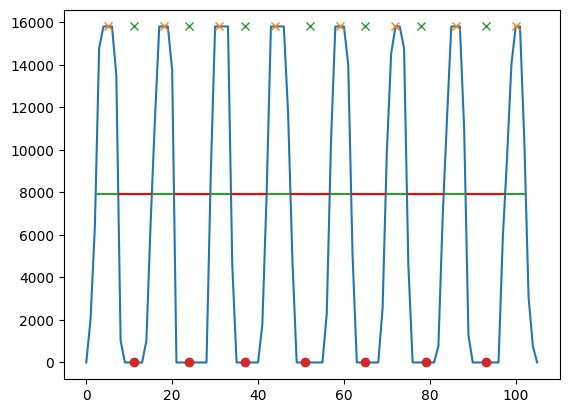

In [5]:

chosen_height = 0.5


# get a list of the images in our output folder. They will all have the same filename, 
# but the different processed images will be in different folders
images = glob.glob(f"./output/strips/*.png")

contour_image_0 = get_processed_image(images[0], "contours")

# invert the contour_image_0
trough_image_0 = cv2.bitwise_not(contour_image_0)

# Lets look at the image as a histogram of where the pixels are in the y axis
# we can use numpy.sum to sum the pixels in the x axis
# and then plot that as a histogram
histogram = numpy.sum(contour_image_0, axis=1)
t_histogram = numpy.sum(trough_image_0, axis=1)

plt.plot(histogram)

# can we find the peaks in the histogram?
# we can use the find_peaks function from scipy
from scipy.signal import find_peaks

peaks, _ = find_peaks(histogram, height=1000)
t_peaks, _ = find_peaks(t_histogram, height=1000)

plt.plot(peaks, histogram[peaks], "x")
plt.plot(t_peaks, t_histogram[t_peaks], "x")

# what about the average distance between the peaks?
peak_distances = numpy.diff(peaks)
trough_distances = numpy.diff(t_peaks)
print(f"Average distance between peaks: {numpy.mean(peak_distances)}, average trough distance: {numpy.mean(trough_distances)}")


# get the half-way point between the peaks
halfway_points = peaks[:-1] + peak_distances // 2
plt.plot(halfway_points, histogram[halfway_points], "o")

# how about the full-width at half-maximum?
# we can use the peak_widths function from scipy
from scipy.signal import peak_widths


results = peak_widths(histogram, peaks, rel_height=chosen_height)
t_results = peak_widths(t_histogram, t_peaks, rel_height=chosen_height)
plt.hlines(*results[1:], color="C2")
plt.hlines(*t_results[1:], color="red")

plt.show()


In [6]:
# create a function that takes an image and returns the histogram with the peaks and half-way points
from scipy.signal import find_peaks, peak_widths

def get_histogram(image_name, image, chosen_fw_height=0.5):

    # Lets look at the image as a histogram of where the pixels are in the y axis
    # we can use numpy.sum to sum the pixels in the x axis
    # and then plot that as a histogram
    histogram = numpy.sum(image, axis=1)

    # get the peaks in the histogram
    peaks, _ = find_peaks(histogram, height=1000)
    t_peaks, _ = find_peaks(t_histogram, height=1000)
    
    peak_heights = histogram[peaks]

    # what about the average distance between the peaks?
    peak_distances = numpy.diff(peaks)
    avg_peak_distance = numpy.mean(peak_distances)

    # get the half-way point between the peaks
    halfway_points = peaks[:-1] + peak_distances // 2

    # how about the full-width at half-maximum?
    # we can use the peak_widths function from scipy
    results = peak_widths(histogram, peaks, rel_height=chosen_height)
    t_results = peak_widths(t_histogram, t_peaks, rel_height=chosen_height)

    return {
        "image_name": image_name,
        "histogram": histogram,
        "peaks": peaks,
        "peak_heights": peak_heights,
        "peak_widths": peak_widths,
        "avg_peak_distance": avg_peak_distance,
        "halfway_points": halfway_points,
        "results": results,
        "t_peaks": t_peaks,
        "t_results": t_results,
    }


In [7]:

def process_peak(peaks, results, i):
    peak = peaks[i]
    width = results[0][i]
    left_base = results[2][i]
    right_base = results[3][i]
    center = left_base + ((right_base - left_base) / 2)
    height = results[1][i]
    return {"peak_num": i, "peak": peak, "height": height, "width": float(width), "left_base": left_base, "right_base": right_base, "center": center}



In [8]:

def get_average_peak_width(results):
    
    a = numpy.mean(results["results"][0]) 
    print("a: ", a)
    return a

def process_image(image):
    image_name = os.path.basename(image).split(".")[0]
    contour_image = get_processed_image(image, "contours")
    hist_results = get_histogram(image_name, contour_image, chosen_height)
    t_hist_results = get_histogram(image_name, cv2.bitwise_not(contour_image), chosen_height)
    peak_results = [process_peak(hist_results["peaks"], hist_results["results"], i) for i in range(len(hist_results["results"][0]))]
    t_peak_results = [process_peak(t_hist_results["peaks"], t_hist_results["results"], i) for i in range(len(t_hist_results["results"][0]))]
    average_peak_height = numpy.mean(hist_results['peak_heights'])
    average_peak_width = get_average_peak_width(hist_results)
    average_trough_width = get_average_peak_width(t_hist_results)
    
    print(hist_results["image_name"])
    print(f"Average distance between peaks: {hist_results['avg_peak_distance']:.2f}")
    print(f"Average peak height: {average_peak_height:.2f}")
    print(f"Average peak width: {average_peak_width:.2f}")

    peak_list = []
    
    for i, both_peaks in enumerate(zip(peak_results, t_peak_results)):
        peak, t_peak = both_peaks
        peak["peak_height"] = hist_results['peak_heights'][i]
        t_peak["peak_height"] = t_hist_results['peak_heights'][i]
        
        # f"Peak_num {peak['peak_num']}: peak: {peak['peak']}, peak_height: {peak['peak_height']}, width: {peak['width']:.2f}, left base: {peak['left_base']:.2f}, right base: {peak['right_base']:.2f}, center: {peak['center']:.2f}"
        peak_dict = {"type": "peak", "num": peak['peak_num'], "peak_idx": peak['peak'], "peak_height": round(peak['peak_height'], 2), "fwhm_width": round(peak['width'], 2), "left_base": round(peak['left_base'], 2), "right_base": round(peak['right_base'], 2), "center": round(peak['center'], 2)}
        t_peak_dict = {"type": "trough", "num": t_peak['peak_num'], "peak_idx": t_peak['peak'], "peak_height": round(t_peak['peak_height'], 2), "fwhm_width": round(t_peak['width'], 2), "left_base": round(t_peak['left_base'], 2), "right_base": round(t_peak['right_base'], 2), "center": round(t_peak['center'], 2)}

        peak_list.append(peak_dict)
        peak_list.append(t_peak_dict)

    return {
        "image_name": image_name,
        "contour_image": contour_image,
        "hist_results": hist_results,
        "peak_results": peak_results,
        "average_peak_height": average_peak_height,
        "average_peak_width": average_peak_width,
        "average_trough_width": average_trough_width,
        "fwhm_dicts": peak_list
    }


In [9]:
import pandas as pd

def display_histogram(data):
    peak_list = data["hist_results"]["peaks"].tolist()
    histogram = data["hist_results"]["histogram"]
    peak_results = data["peak_results"]
    height_th = data["average_peak_height"] * .6
    width_th = data["average_peak_width"] * .8
    
    print(f"height_th: {height_th}, width_th: {width_th}")

    # plot the bare histogram
    plt.figure(figsize=(10, 5))
    plt.title("FWHM Histogram with peak")
    plt.plot(data["hist_results"]["histogram"])

    # plot the left base, right base and center for each peak
    for peak in peak_results:
        if peak["peak_height"] > height_th and peak["width"] > width_th:
            plt.axvline(x=peak["left_base"], color='r')
            plt.axvline(x=peak["right_base"], color='r')
            plt.axvline(x=peak["center"], color='cyan')


def filter_peaks_by_height_and_width(fwhm_dicts, height_th, peak_width_th, trough_width_th):
     
    filtered_peaks = []
    
    # compare the peak height and width to the thresholds, for each peak and trough
    for peak in fwhm_dicts:
        if peak["peak_height"] > height_th and peak["fwhm_width"] > peak_width_th and peak["type"] == "peak":
            filtered_peaks.append(peak)
        elif peak["peak_height"] > height_th and peak["fwhm_width"] > trough_width_th and peak["type"] == "trough":
            filtered_peaks.append(peak)
            
    return filtered_peaks

def calculate_peak_to_peak_distance(df):
    """ we can calculate the distance between each peak and the next peak"""
    
    # filter the rows to only include rows that have the col "type" == "peak"
    peak_df = df[df["type"] == "peak"].copy()
    trough_df = df[df["type"] == "trough"].copy()
    
    peak_df["distance_to_next_peak"] = peak_df["center"].diff()
    trough_df["distance_to_next_peak"] = trough_df["center"].diff()
    
    df = pd.concat([peak_df, trough_df])
    print(df)

    return df

In [10]:
import json

chosen_height = 0.5 # FWHM height, as a fraction of the peak height. 0.5 is the default
trial_number = 0
height_th_ratio = .6
width_th_ratio = .8
base_path = f"./output/trial_{trial_number}"
output_path = os.path.join(base_path, "data")
metadata_path = os.path.join(base_path, "metadata.json")

images = glob.glob(f"./output/trial_{trial_number}/strips/*.png")
hist_data = [process_image(image) for image in images]

for data in hist_data:
    # peak_list = data["hist_results"]["peaks"].tolist()
    # histogram = data["hist_results"]["histogram"]
    # peak_results = data["peak_results"]
    image_name = data["image_name"]
    fwhm_dicts = data["fwhm_dicts"]
    height_th = height_th_ratio * data["average_peak_height"]
    peak_width_th = width_th_ratio * data["average_peak_width"]
    trough_width_th = width_th_ratio * data["average_trough_width"]
    
    filtered_peaks = filter_peaks_by_height_and_width(fwhm_dicts, height_th, peak_width_th, trough_width_th)
    
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        
    df = pandas.DataFrame(filtered_peaks)

    df = calculate_peak_to_peak_distance(df)
    
    # write the dataframe out to a csv file
    df.to_csv(f"{output_path}/{image_name}_data.csv", index=False)
    
# update the metadata with the height_th and width_th_ratio
with open(metadata_path, "r") as f:
    metadata = json.load(f)
    
metadata["height_th_ratio"] = height_th_ratio
metadata["width_th_ratio"] = width_th_ratio
metadata["trial_number"] = trial_number
metadata["chosen_height"] = chosen_height

with open(metadata_path, "w") as f:
    print("writing metadata to ", metadata_path)
    json.dump(metadata, f, indent=4)

a:  5.082306753076212
a:  8.500650768539858
013 WT-DA-1 19k new sec strip 2
Average distance between peaks: 13.57
Average peak height: 15810.00
Average peak width: 5.08
a:  4.432480168309034
a:  7.249695060063573
013 WT-DA-1 19k new sec strip 4
Average distance between peaks: 11.43
Average peak height: 7490.62
Average peak width: 4.43
a:  5.726646933041656
a:  8.634207874353747
004 WT-DA 25k strip 2
Average distance between peaks: 14.17
Average peak height: 34170.00
Average peak width: 5.73
a:  6.275595673394213
a:  8.55106703389159
004 WT-DA 25k strip 5
Average distance between peaks: 14.50
Average peak height: 33623.57
Average peak width: 6.28
a:  4.520029831427113
a:  7.820391624511583
004 WT-DA 25k strip 3
Average distance between peaks: 12.38
Average peak height: 12126.67
Average peak width: 4.52
a:  5.282973225782234
a:  8.15211223175908
013 WT-DA-1 19k new sec strip 3
Average distance between peaks: 13.57
Average peak height: 12240.00
Average peak width: 5.28
a:  5.4726937397581

left_base,right_base,center,image_name,height_th,width_th,type,num,peak_idx,peak_height,fwhm_width


## Plot peaks and troughs on the strip images

now we need to import that data, and plot each of the peaks, and the troughs. We do that by loading the original image strip, rotating it 90 degrees, and the drawing the peak center and trough center as vertical lines on the image. 


013 WT-DA-1 19k new sec strip 2
(14, 9)
(62, 106, 3)
013 WT-DA-1 19k new sec strip 4
(12, 9)
(33, 106, 3)
004 WT-DA 25k strip 2
(12, 9)
(135, 101, 3)
004 WT-DA 25k strip 5
(10, 9)
(153, 105, 3)
004 WT-DA 25k strip 3
(15, 9)
(53, 126, 3)
013 WT-DA-1 19k new sec strip 3
(14, 9)
(48, 106, 3)
013 WT-DA-1 19k new sec strip 1
(17, 9)
(48, 147, 3)
004 WT-DA 25k strip 4
(12, 9)
(123, 125, 3)
004 WT-DA 25k strip 1
(12, 9)
(76, 101, 3)


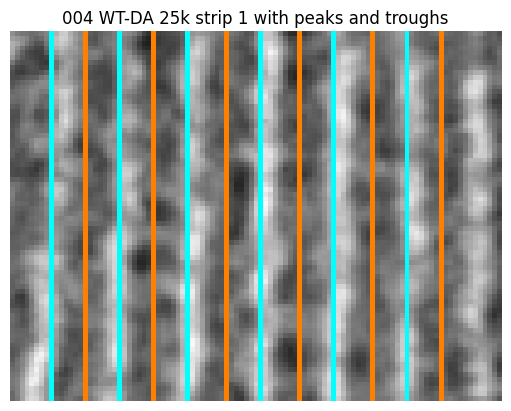

In [11]:

# import the images again, this time the raw image
raw_images = glob.glob(f"./output/strips/*.png")

# peak/trough image folder is in the "peak_trough" folder
output_path = os.path.join(base_path, "peak_trough")
data_path = os.path.join(base_path, "data")

# cyan for peak color line
peak_color = (0, 255, 255)
trough_color = (255, 128, 0)

if not os.path.exists(output_path):
    os.makedirs(output_path)

for image in raw_images:
    raw_image = get_processed_image(image, "strips")
    
    # rotate the image 90 degrees counter-clockwise
    raw_image = cv2.rotate(raw_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    # convert it to an rgb image from grayscale
    raw_image = cv2.cvtColor(raw_image, cv2.COLOR_GRAY2RGB)
    
    # get the base name of the image, strip out the png, and then use that to load the csv file
    image_name = os.path.basename(image).split(".")[0]
    df = pd.read_csv(f"{data_path}/{image_name}_data.csv")
    
    print(image_name)
    print(df.shape)
    print(raw_image.shape)
    
    peak_df = df[df["type"]=="peak"]
    trough_df = df[df["type"]=="trough"]

    
    for center in peak_df["center"]:
        cv2.line(raw_image, (int(center), 0), (int(center), raw_image.shape[0]), peak_color, 1)
    
    # add a vertical line to the image for each trough
    for center in trough_df["center"]:
        cv2.line(raw_image, (int(center), 0), (int(center), raw_image.shape[0]), trough_color, 1)
    
    plt.title(f"{image_name} with peaks and troughs")
    
    # get rid of the axes and all of that
    plt.imshow(raw_image, cmap="viridis")
    plt.axis("off")
    plt.imsave(f"{output_path}/{image_name}.png", raw_image)



# Create image dict
We need to create an image dict, with the image name as the key, and the value being a dict with the following keys:
raw_image: the original image
thresholded: the thresholded image
contours: the contours image
overlay: the overlay image
peak_trough: the peak and trough image

In [12]:
def create_image_dict(image_name, base_path="./output/trial_0"):
    def get_abs_path(image_type):
        return os.path.abspath(f"{base_path}/{image_type}/{image_name}.png")
    
    return {
        "raw": get_abs_path("strips"),
        "equalized": get_abs_path("equalized"),
        "thresholded": get_abs_path("thresholded"),
        "contours": get_abs_path("contours"),
        "overlay": get_abs_path("overlay"),
        "peak_trough": get_abs_path("peak_trough")
    }

image_names = [os.path.basename(image).split(".")[0] for image in images]

image_paths = {f"{image_name}": create_image_dict(image_name) for image_name in image_names}
    

In [13]:
import cv2
import numpy as np

def add_horizontal_peak_trough_lines(image, csv_path, peak_color=(255, 128, 0), trough_color=(0, 255, 255), alpha=0.5, width=10):
    df = pd.read_csv(csv_path)
    peak_df = df[df["type"]=="peak"]
    trough_df = df[df["type"]=="trough"]

    # Create a copy of the original image to draw lines on
    line_image = image.copy()

    for center in peak_df["center"]:
        # add a horizontal line at the y coordinate center
        cv2.line(line_image, (0, int(center)), (line_image.shape[1], int(center)), peak_color, width)

    for center in trough_df["center"]:
        # add a horizontal line at the y coordinate center
        cv2.line(line_image, (0, int(center)), (line_image.shape[1], int(center)), trough_color, width)

    # Blend the original image with the line image
    cv2.addWeighted(line_image, alpha, image, 1 - alpha, 0, image)

    return image

def load_rgb_image(image_path):
    bgr_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    return rgb_image

## Create a comparison image
We need to see a comparison of all the iamges we have created so far


./output/trial_0/data/013 WT-DA-1 19k new sec strip 2_data.csv
fig_height: 4.24


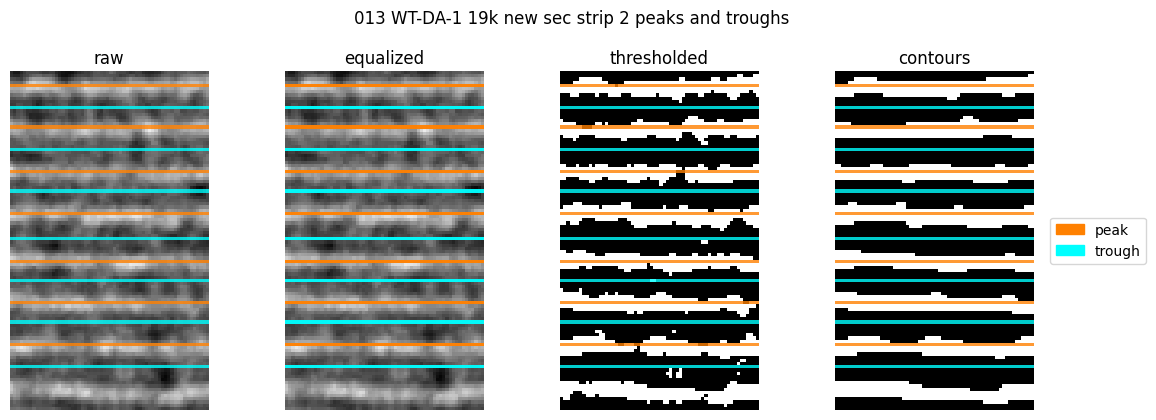

./output/trial_0/data/013 WT-DA-1 19k new sec strip 4_data.csv
fig_height: 4.24


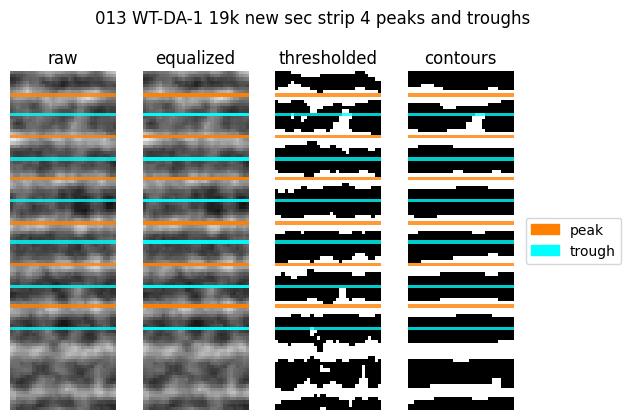

./output/trial_0/data/004 WT-DA 25k strip 2_data.csv
fig_height: 4.04


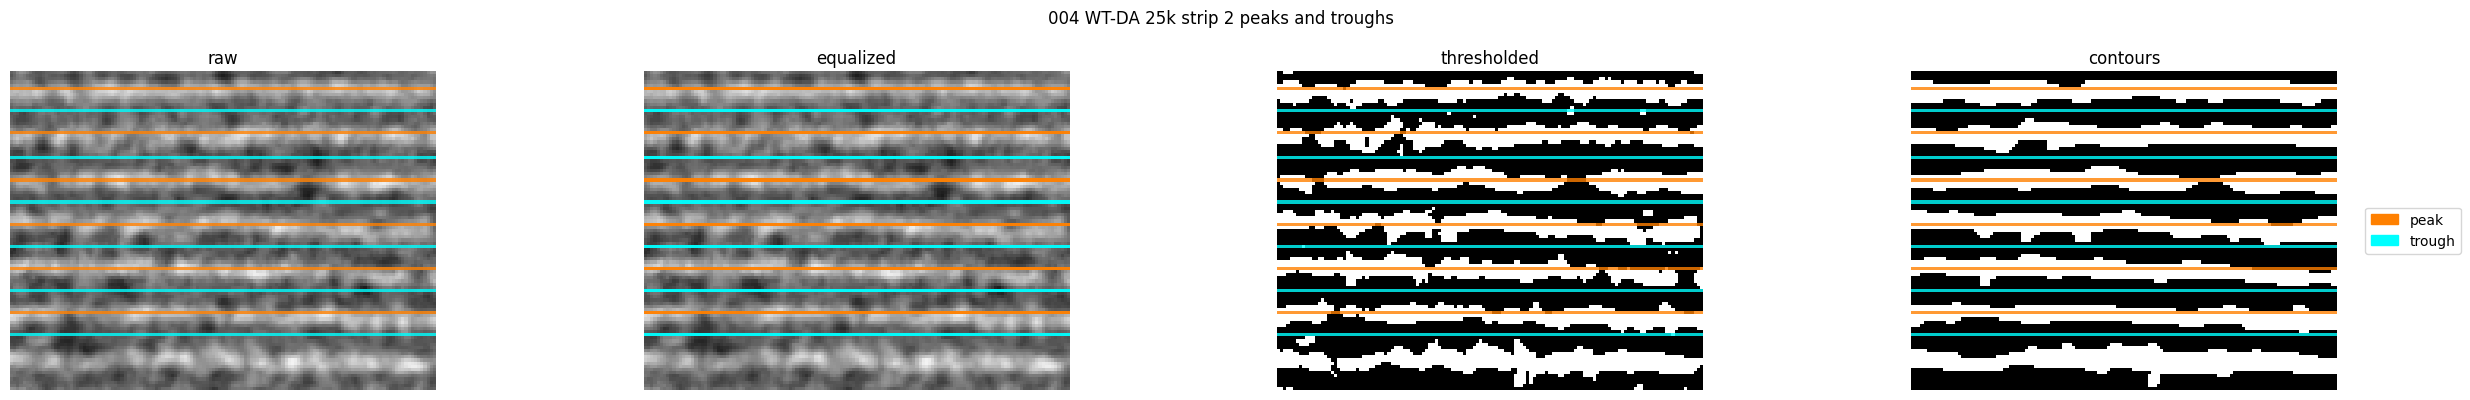

./output/trial_0/data/004 WT-DA 25k strip 5_data.csv
fig_height: 4.2


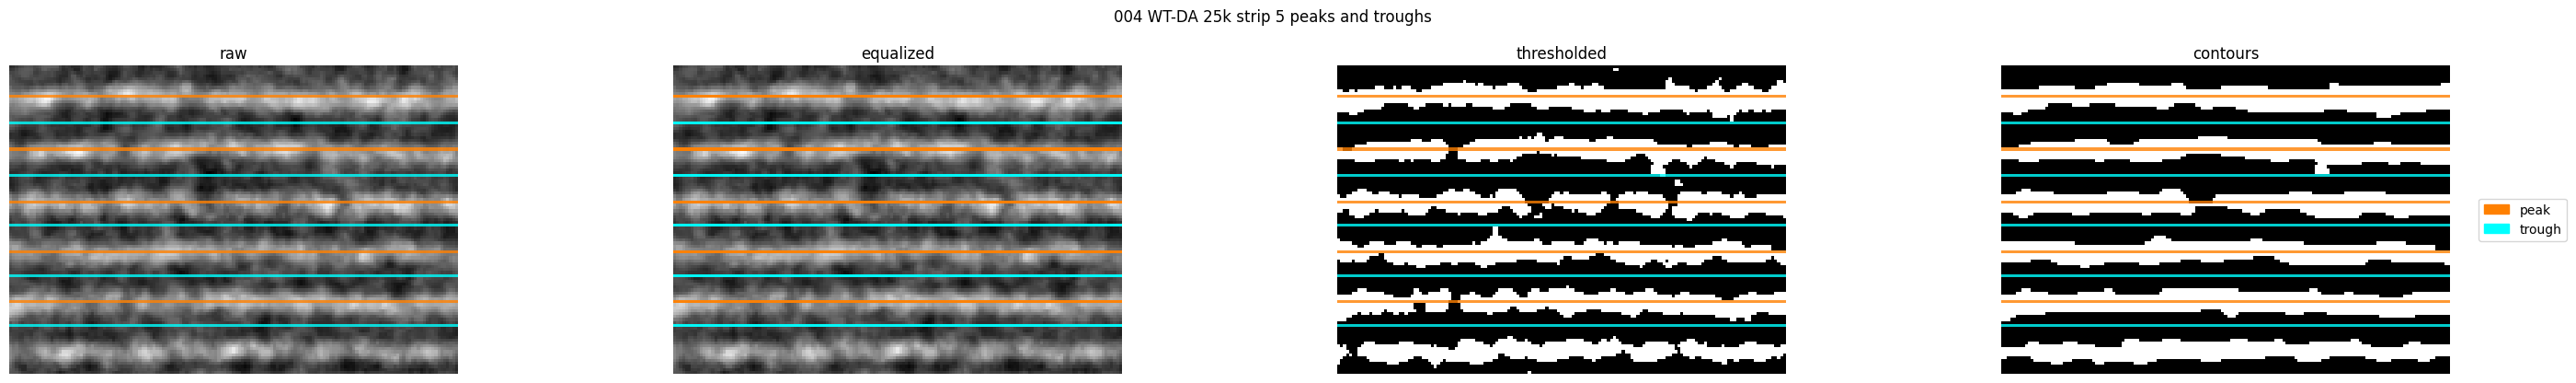

./output/trial_0/data/004 WT-DA 25k strip 3_data.csv
fig_height: 5.04


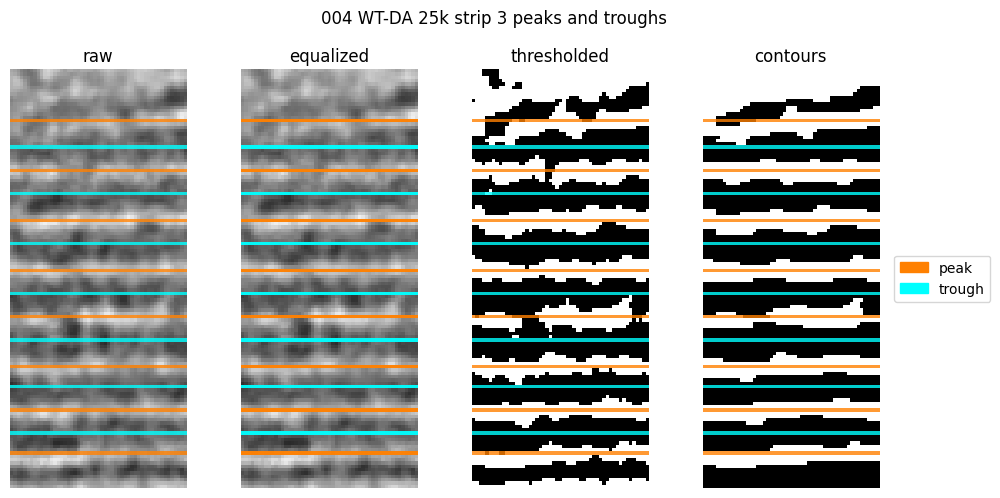

./output/trial_0/data/013 WT-DA-1 19k new sec strip 3_data.csv
fig_height: 4.24


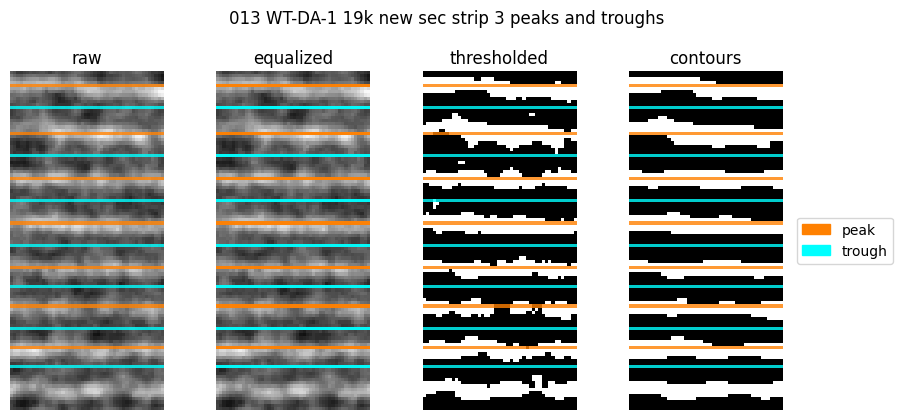

./output/trial_0/data/013 WT-DA-1 19k new sec strip 1_data.csv
fig_height: 5.88


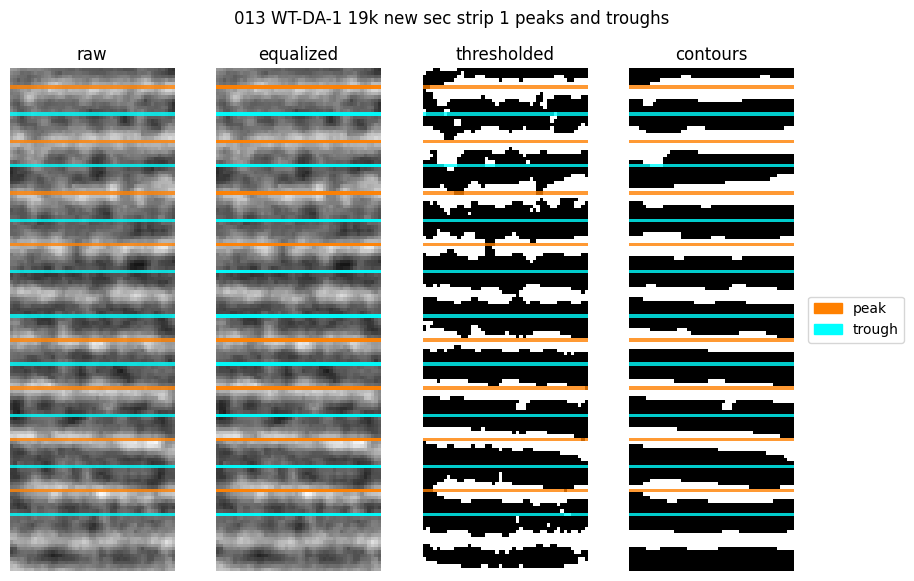

./output/trial_0/data/004 WT-DA 25k strip 4_data.csv
fig_height: 5.0


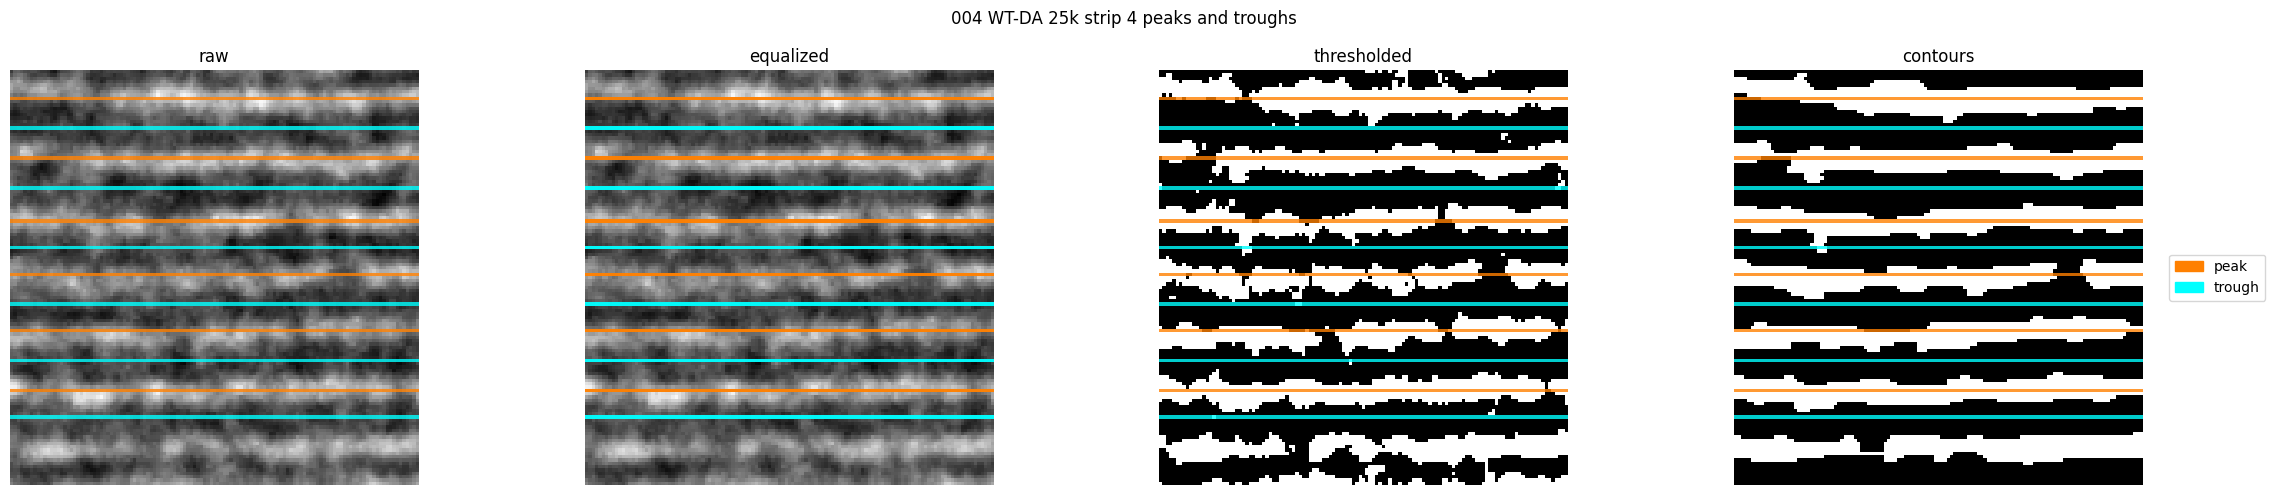

./output/trial_0/data/004 WT-DA 25k strip 1_data.csv
fig_height: 4.04


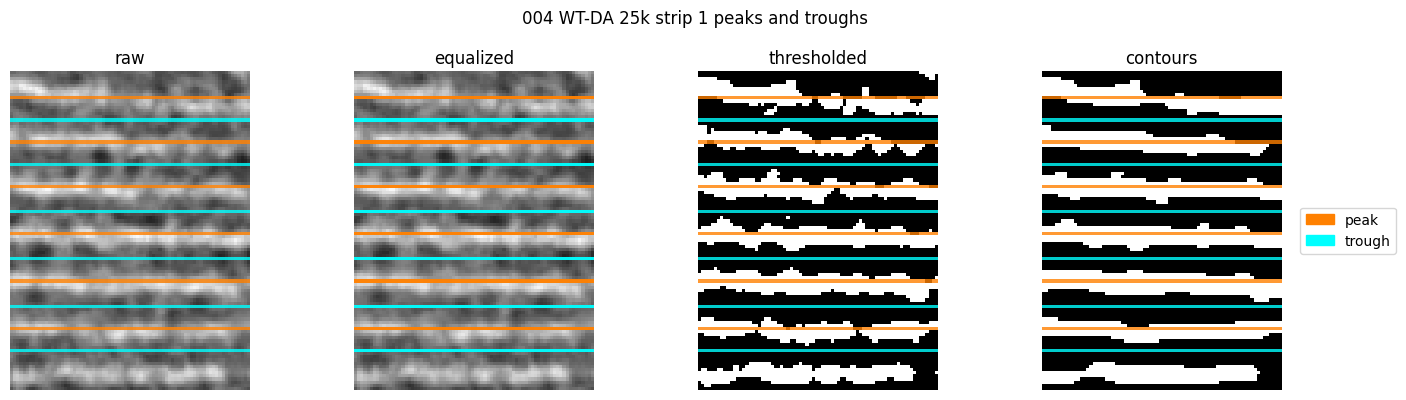

In [14]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

output_path = os.path.join(base_path, "peak_trough")
data_path = os.path.join(base_path, "data")
line_alpha = 0.8
line_width = 1
peak_color=(255, 128, 0)
trough_color=(0, 255, 255)

#create the directory if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

for image in image_paths:
    csv_path = f"{data_path}/{image}_data.csv"
    print(csv_path)
    
    # load as color images
    raw_image = load_rgb_image(image_paths[image]["raw"])
    equalized_image = load_rgb_image(image_paths[image]["equalized"])
    thresholded_image = load_rgb_image(image_paths[image]["thresholded"])
    contours_image = load_rgb_image(image_paths[image]["contours"])
    overlay_image = load_rgb_image(image_paths[image]["overlay"])
    
    # calculate the size of the figure
    fig_width = raw_image.shape[1] / 5
    fig_height = raw_image.shape[0] / 25
    print(f"fig_height: {fig_height}")
    # create a plot with subplots for all of the images so we can compare them
    fig, axs = plt.subplots(1, 4, figsize=(fig_width, fig_height))
    plt.subplots_adjust(top=0.85)  # Adjust the top of the figure to make room for the suptitle
    fig.suptitle(f"{image} peaks and troughs")
    

    raw_image = add_horizontal_peak_trough_lines(raw_image, csv_path, peak_color=peak_color, trough_color=trough_color, alpha=line_alpha, width=line_width)
    axs[0].imshow(raw_image, cmap="gray")
    axs[0].set_title("raw")
    axs[0].axis("off")

    equalized_image = add_horizontal_peak_trough_lines(raw_image, csv_path,peak_color=peak_color, trough_color=trough_color,  alpha=line_alpha, width=line_width)
    axs[1].imshow(equalized_image, cmap="gray")
    axs[1].set_title("equalized")
    axs[1].axis("off")

    thresholded_image = add_horizontal_peak_trough_lines(thresholded_image, csv_path,peak_color=peak_color, trough_color=trough_color,  alpha=line_alpha, width=line_width)
    axs[2].imshow(thresholded_image, cmap="gray")
    axs[2].set_title("thresholded")
    axs[2].axis("off")

    contours_image = add_horizontal_peak_trough_lines(contours_image, csv_path,peak_color=peak_color, trough_color=trough_color,  alpha=line_alpha, width=line_width)
    axs[3].imshow(contours_image, cmap="gray")
    axs[3].set_title("contours")
    axs[3].axis("off")

    # add a legend showing that the peak_color has a label "peak" and the trough_color has a label "trough"
    peak_patch = Patch(color=tuple(np.array(peak_color)/255), label='peak')
    trough_patch = Patch(color=tuple(np.array(trough_color)/255), label='trough')
    plt.legend(handles=[peak_patch, trough_patch], bbox_to_anchor=(1.05, 0.5), loc='center left')

    plt.tight_layout()
    # save it to the comparison2 folder
    plt.savefig(f"{output_path}/{image}.png")
    plt.show()
    


# now lets do something similar with the FWHM for both peaks and troughs


In [15]:
import cv2
import numpy as np

def add_fwhm_boxes(image, csv_path, peak_color=(255, 128, 0), trough_color=(0, 255, 255), alpha=0.2):
    df = pd.read_csv(csv_path)
    peak_df = df[df["type"]=="peak"]
    trough_df = df[df["type"]=="trough"]

    # Create a copy of the original image to draw lines on
    overlay = image.copy()
    
    print(f"image y = {image.shape[0]}, image x = {image.shape[1]}")
    
    for index, row in df.iterrows():
        top_y = int(row["left_base"])
        bottom_y = int(row["right_base"])
        print(f"top_y: {top_y}, bottom_y: {bottom_y}")
        box_color = peak_color if row["type"] == "peak" else trough_color
        cv2.rectangle(overlay, (0, top_y), (image.shape[1], bottom_y), box_color, -1)

    # Blend the original image with the line image
    cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)

    return image
    


./output/trial_0/data/013 WT-DA-1 19k new sec strip 2_data.csv
fig_height: 4.24
image y = 106, image x = 62
top_y: 2, bottom_y: 7
top_y: 15, bottom_y: 20
top_y: 28, bottom_y: 33
top_y: 42, bottom_y: 47
top_y: 56, bottom_y: 61
top_y: 69, bottom_y: 74
top_y: 83, bottom_y: 88
top_y: 7, bottom_y: 15
top_y: 20, bottom_y: 28
top_y: 33, bottom_y: 42
top_y: 47, bottom_y: 56
top_y: 61, bottom_y: 69
top_y: 74, bottom_y: 83
top_y: 88, bottom_y: 97
image y = 106, image x = 62
top_y: 2, bottom_y: 7
top_y: 15, bottom_y: 20
top_y: 28, bottom_y: 33
top_y: 42, bottom_y: 47
top_y: 56, bottom_y: 61
top_y: 69, bottom_y: 74
top_y: 83, bottom_y: 88
top_y: 7, bottom_y: 15
top_y: 20, bottom_y: 28
top_y: 33, bottom_y: 42
top_y: 47, bottom_y: 56
top_y: 61, bottom_y: 69
top_y: 74, bottom_y: 83
top_y: 88, bottom_y: 97
image y = 106, image x = 62
top_y: 2, bottom_y: 7
top_y: 15, bottom_y: 20
top_y: 28, bottom_y: 33
top_y: 42, bottom_y: 47
top_y: 56, bottom_y: 61
top_y: 69, bottom_y: 74
top_y: 83, bottom_y: 88
top_

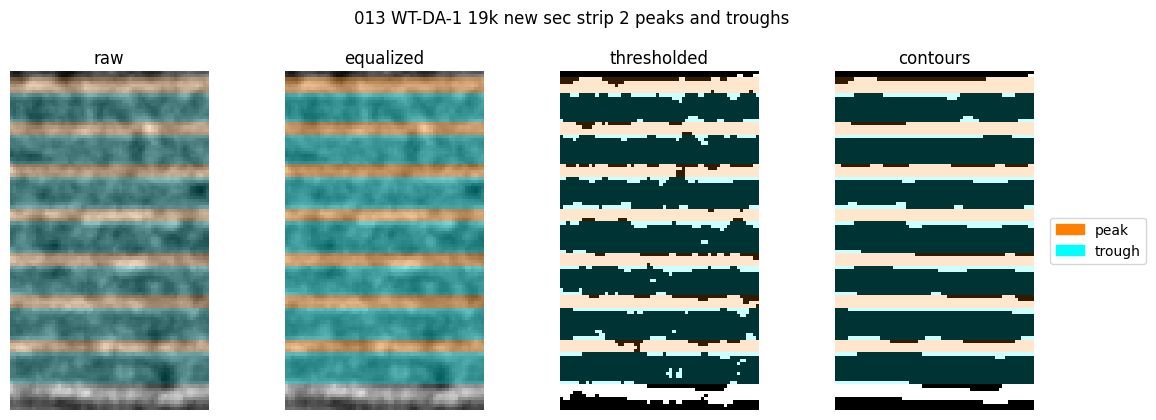

./output/trial_0/data/013 WT-DA-1 19k new sec strip 4_data.csv
fig_height: 4.24
image y = 106, image x = 33
top_y: 5, bottom_y: 9
top_y: 18, bottom_y: 23
top_y: 31, bottom_y: 36
top_y: 45, bottom_y: 49
top_y: 57, bottom_y: 62
top_y: 71, bottom_y: 76
top_y: 9, bottom_y: 18
top_y: 23, bottom_y: 31
top_y: 36, bottom_y: 45
top_y: 49, bottom_y: 57
top_y: 62, bottom_y: 71
top_y: 76, bottom_y: 84
image y = 106, image x = 33
top_y: 5, bottom_y: 9
top_y: 18, bottom_y: 23
top_y: 31, bottom_y: 36
top_y: 45, bottom_y: 49
top_y: 57, bottom_y: 62
top_y: 71, bottom_y: 76
top_y: 9, bottom_y: 18
top_y: 23, bottom_y: 31
top_y: 36, bottom_y: 45
top_y: 49, bottom_y: 57
top_y: 62, bottom_y: 71
top_y: 76, bottom_y: 84
image y = 106, image x = 33
top_y: 5, bottom_y: 9
top_y: 18, bottom_y: 23
top_y: 31, bottom_y: 36
top_y: 45, bottom_y: 49
top_y: 57, bottom_y: 62
top_y: 71, bottom_y: 76
top_y: 9, bottom_y: 18
top_y: 23, bottom_y: 31
top_y: 36, bottom_y: 45
top_y: 49, bottom_y: 57
top_y: 62, bottom_y: 71
top_y

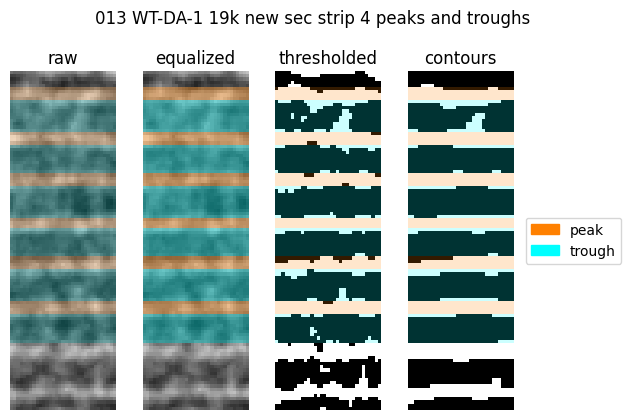

./output/trial_0/data/004 WT-DA 25k strip 2_data.csv
fig_height: 4.04
image y = 101, image x = 135
top_y: 2, bottom_y: 8
top_y: 17, bottom_y: 22
top_y: 31, bottom_y: 36
top_y: 45, bottom_y: 51
top_y: 59, bottom_y: 65
top_y: 74, bottom_y: 79
top_y: 8, bottom_y: 17
top_y: 22, bottom_y: 31
top_y: 36, bottom_y: 45
top_y: 51, bottom_y: 59
top_y: 65, bottom_y: 74
top_y: 79, bottom_y: 88
image y = 101, image x = 135
top_y: 2, bottom_y: 8
top_y: 17, bottom_y: 22
top_y: 31, bottom_y: 36
top_y: 45, bottom_y: 51
top_y: 59, bottom_y: 65
top_y: 74, bottom_y: 79
top_y: 8, bottom_y: 17
top_y: 22, bottom_y: 31
top_y: 36, bottom_y: 45
top_y: 51, bottom_y: 59
top_y: 65, bottom_y: 74
top_y: 79, bottom_y: 88
image y = 101, image x = 135
top_y: 2, bottom_y: 8
top_y: 17, bottom_y: 22
top_y: 31, bottom_y: 36
top_y: 45, bottom_y: 51
top_y: 59, bottom_y: 65
top_y: 74, bottom_y: 79
top_y: 8, bottom_y: 17
top_y: 22, bottom_y: 31
top_y: 36, bottom_y: 45
top_y: 51, bottom_y: 59
top_y: 65, bottom_y: 74
top_y: 79, b

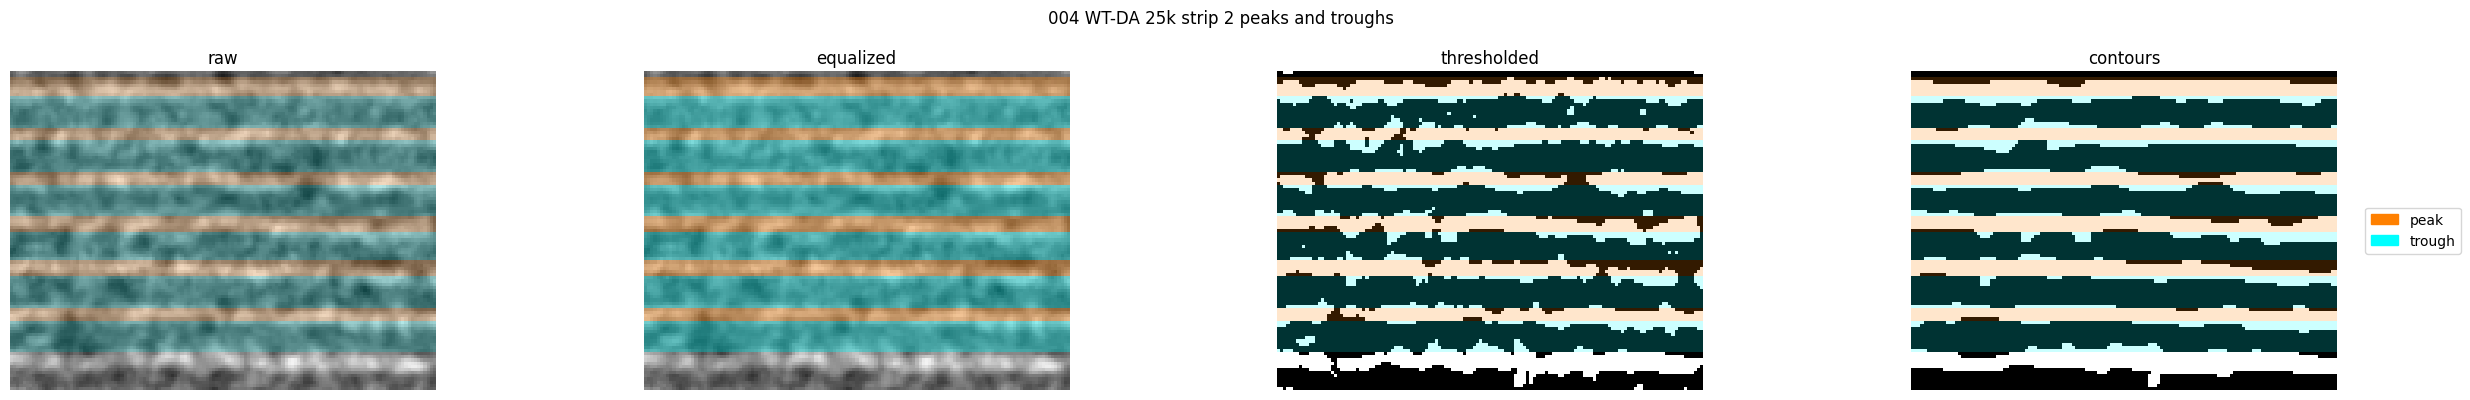

./output/trial_0/data/004 WT-DA 25k strip 5_data.csv
fig_height: 4.2
image y = 105, image x = 153
top_y: 6, bottom_y: 14
top_y: 25, bottom_y: 32
top_y: 43, bottom_y: 49
top_y: 59, bottom_y: 66
top_y: 76, bottom_y: 83
top_y: 14, bottom_y: 25
top_y: 32, bottom_y: 43
top_y: 49, bottom_y: 59
top_y: 66, bottom_y: 76
top_y: 83, bottom_y: 93
image y = 105, image x = 153
top_y: 6, bottom_y: 14
top_y: 25, bottom_y: 32
top_y: 43, bottom_y: 49
top_y: 59, bottom_y: 66
top_y: 76, bottom_y: 83
top_y: 14, bottom_y: 25
top_y: 32, bottom_y: 43
top_y: 49, bottom_y: 59
top_y: 66, bottom_y: 76
top_y: 83, bottom_y: 93
image y = 105, image x = 153
top_y: 6, bottom_y: 14
top_y: 25, bottom_y: 32
top_y: 43, bottom_y: 49
top_y: 59, bottom_y: 66
top_y: 76, bottom_y: 83
top_y: 14, bottom_y: 25
top_y: 32, bottom_y: 43
top_y: 49, bottom_y: 59
top_y: 66, bottom_y: 76
top_y: 83, bottom_y: 93
image y = 105, image x = 153
top_y: 6, bottom_y: 14
top_y: 25, bottom_y: 32
top_y: 43, bottom_y: 49
top_y: 59, bottom_y: 66
top

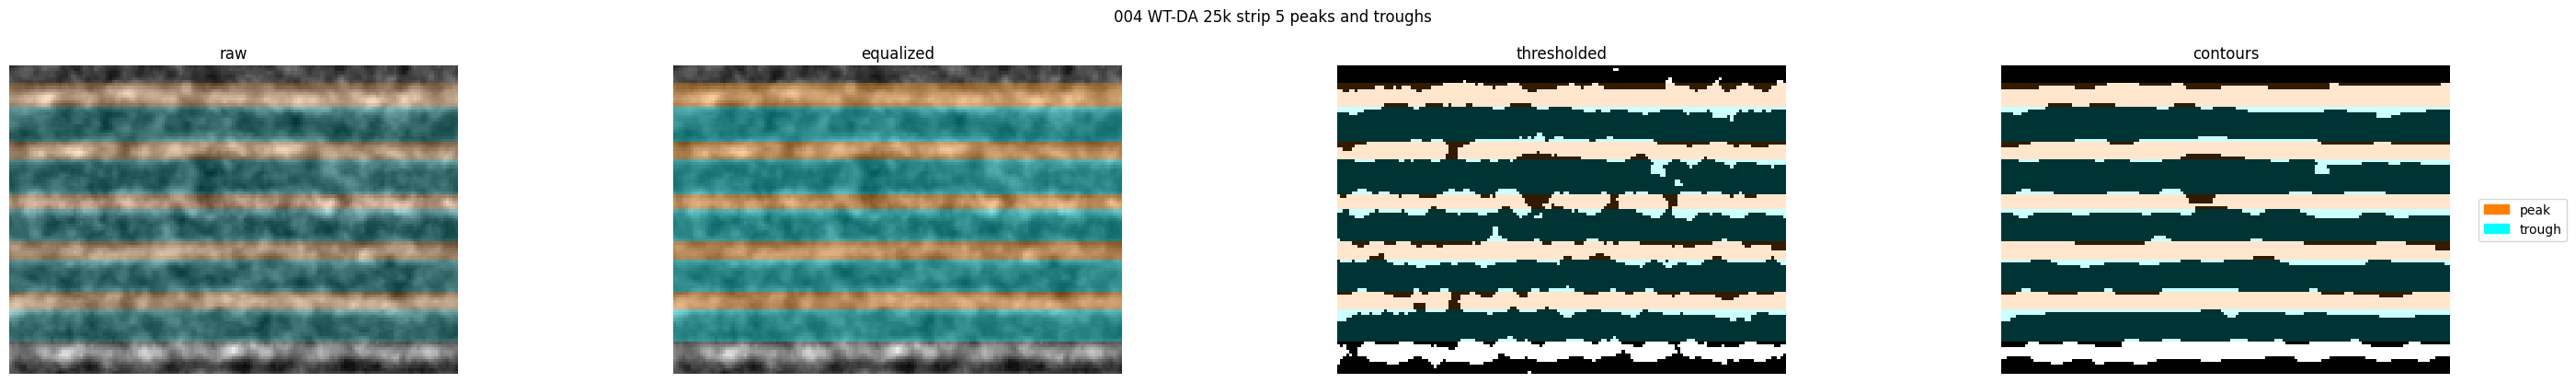

./output/trial_0/data/004 WT-DA 25k strip 3_data.csv
fig_height: 5.04
image y = 126, image x = 53
top_y: 13, bottom_y: 18
top_y: 27, bottom_y: 32
top_y: 42, bottom_y: 47
top_y: 57, bottom_y: 62
top_y: 71, bottom_y: 76
top_y: 86, bottom_y: 91
top_y: 99, bottom_y: 104
top_y: 114, bottom_y: 117
top_y: 18, bottom_y: 27
top_y: 32, bottom_y: 42
top_y: 47, bottom_y: 57
top_y: 62, bottom_y: 71
top_y: 76, bottom_y: 86
top_y: 91, bottom_y: 99
top_y: 104, bottom_y: 114
image y = 126, image x = 53
top_y: 13, bottom_y: 18
top_y: 27, bottom_y: 32
top_y: 42, bottom_y: 47
top_y: 57, bottom_y: 62
top_y: 71, bottom_y: 76
top_y: 86, bottom_y: 91
top_y: 99, bottom_y: 104
top_y: 114, bottom_y: 117
top_y: 18, bottom_y: 27
top_y: 32, bottom_y: 42
top_y: 47, bottom_y: 57
top_y: 62, bottom_y: 71
top_y: 76, bottom_y: 86
top_y: 91, bottom_y: 99
top_y: 104, bottom_y: 114
image y = 126, image x = 53
top_y: 13, bottom_y: 18
top_y: 27, bottom_y: 32
top_y: 42, bottom_y: 47
top_y: 57, bottom_y: 62
top_y: 71, bottom_y:

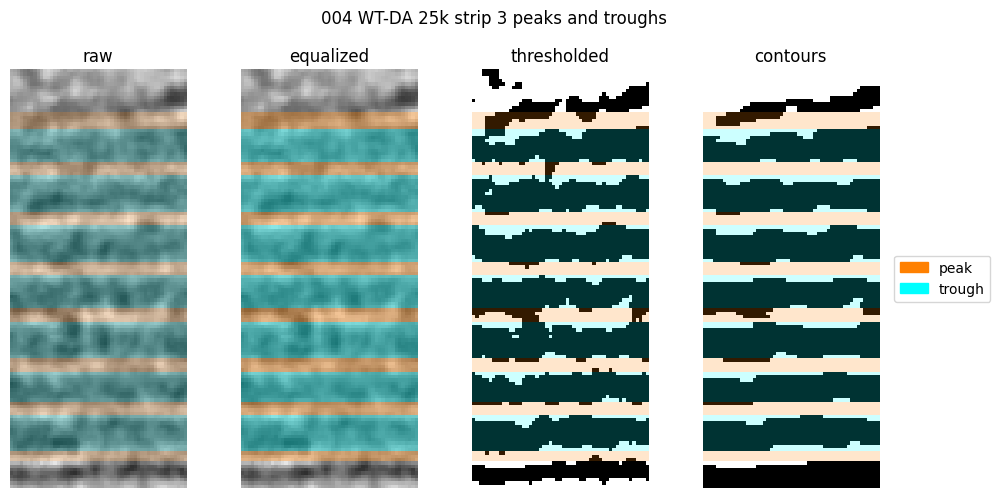

./output/trial_0/data/013 WT-DA-1 19k new sec strip 3_data.csv
fig_height: 4.24
image y = 106, image x = 48
top_y: 2, bottom_y: 7
top_y: 16, bottom_y: 22
top_y: 30, bottom_y: 35
top_y: 44, bottom_y: 50
top_y: 58, bottom_y: 63
top_y: 71, bottom_y: 76
top_y: 83, bottom_y: 89
top_y: 7, bottom_y: 16
top_y: 22, bottom_y: 30
top_y: 35, bottom_y: 44
top_y: 50, bottom_y: 58
top_y: 63, bottom_y: 71
top_y: 76, bottom_y: 83
top_y: 89, bottom_y: 96
image y = 106, image x = 48
top_y: 2, bottom_y: 7
top_y: 16, bottom_y: 22
top_y: 30, bottom_y: 35
top_y: 44, bottom_y: 50
top_y: 58, bottom_y: 63
top_y: 71, bottom_y: 76
top_y: 83, bottom_y: 89
top_y: 7, bottom_y: 16
top_y: 22, bottom_y: 30
top_y: 35, bottom_y: 44
top_y: 50, bottom_y: 58
top_y: 63, bottom_y: 71
top_y: 76, bottom_y: 83
top_y: 89, bottom_y: 96
image y = 106, image x = 48
top_y: 2, bottom_y: 7
top_y: 16, bottom_y: 22
top_y: 30, bottom_y: 35
top_y: 44, bottom_y: 50
top_y: 58, bottom_y: 63
top_y: 71, bottom_y: 76
top_y: 83, bottom_y: 89
top_

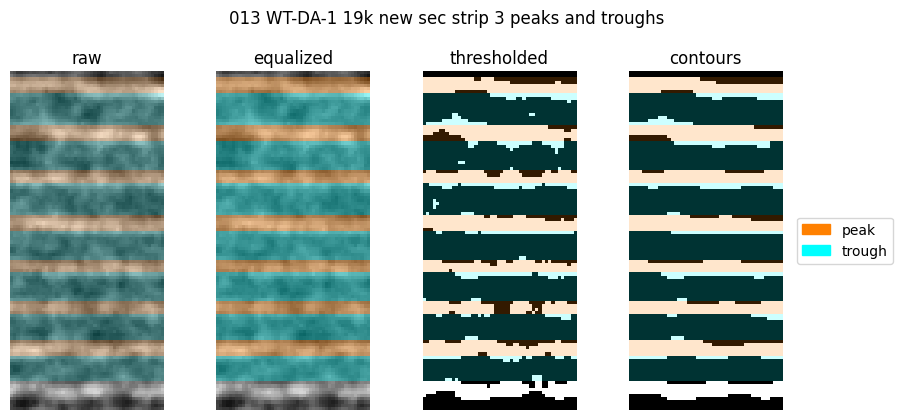

./output/trial_0/data/013 WT-DA-1 19k new sec strip 1_data.csv
fig_height: 5.88
image y = 147, image x = 48
top_y: 2, bottom_y: 8
top_y: 17, bottom_y: 24
top_y: 33, bottom_y: 39
top_y: 49, bottom_y: 54
top_y: 76, bottom_y: 82
top_y: 91, bottom_y: 96
top_y: 105, bottom_y: 110
top_y: 121, bottom_y: 125
top_y: 8, bottom_y: 17
top_y: 24, bottom_y: 33
top_y: 39, bottom_y: 49
top_y: 54, bottom_y: 63
top_y: 67, bottom_y: 76
top_y: 82, bottom_y: 91
top_y: 96, bottom_y: 105
top_y: 110, bottom_y: 121
top_y: 125, bottom_y: 135
image y = 147, image x = 48
top_y: 2, bottom_y: 8
top_y: 17, bottom_y: 24
top_y: 33, bottom_y: 39
top_y: 49, bottom_y: 54
top_y: 76, bottom_y: 82
top_y: 91, bottom_y: 96
top_y: 105, bottom_y: 110
top_y: 121, bottom_y: 125
top_y: 8, bottom_y: 17
top_y: 24, bottom_y: 33
top_y: 39, bottom_y: 49
top_y: 54, bottom_y: 63
top_y: 67, bottom_y: 76
top_y: 82, bottom_y: 91
top_y: 96, bottom_y: 105
top_y: 110, bottom_y: 121
top_y: 125, bottom_y: 135
image y = 147, image x = 48
top_y: 2

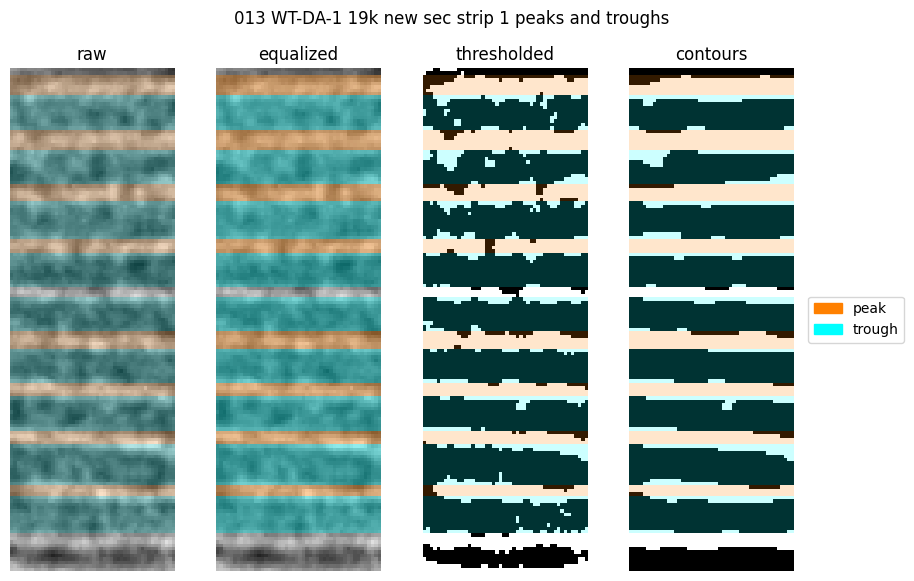

./output/trial_0/data/004 WT-DA 25k strip 4_data.csv
fig_height: 5.0
image y = 125, image x = 123
top_y: 4, bottom_y: 12
top_y: 23, bottom_y: 30
top_y: 41, bottom_y: 48
top_y: 58, bottom_y: 65
top_y: 75, bottom_y: 81
top_y: 92, bottom_y: 99
top_y: 12, bottom_y: 23
top_y: 30, bottom_y: 41
top_y: 48, bottom_y: 58
top_y: 64, bottom_y: 75
top_y: 81, bottom_y: 92
top_y: 99, bottom_y: 109
image y = 125, image x = 123
top_y: 4, bottom_y: 12
top_y: 23, bottom_y: 30
top_y: 41, bottom_y: 48
top_y: 58, bottom_y: 65
top_y: 75, bottom_y: 81
top_y: 92, bottom_y: 99
top_y: 12, bottom_y: 23
top_y: 30, bottom_y: 41
top_y: 48, bottom_y: 58
top_y: 64, bottom_y: 75
top_y: 81, bottom_y: 92
top_y: 99, bottom_y: 109
image y = 125, image x = 123
top_y: 4, bottom_y: 12
top_y: 23, bottom_y: 30
top_y: 41, bottom_y: 48
top_y: 58, bottom_y: 65
top_y: 75, bottom_y: 81
top_y: 92, bottom_y: 99
top_y: 12, bottom_y: 23
top_y: 30, bottom_y: 41
top_y: 48, bottom_y: 58
top_y: 64, bottom_y: 75
top_y: 81, bottom_y: 92
top_y

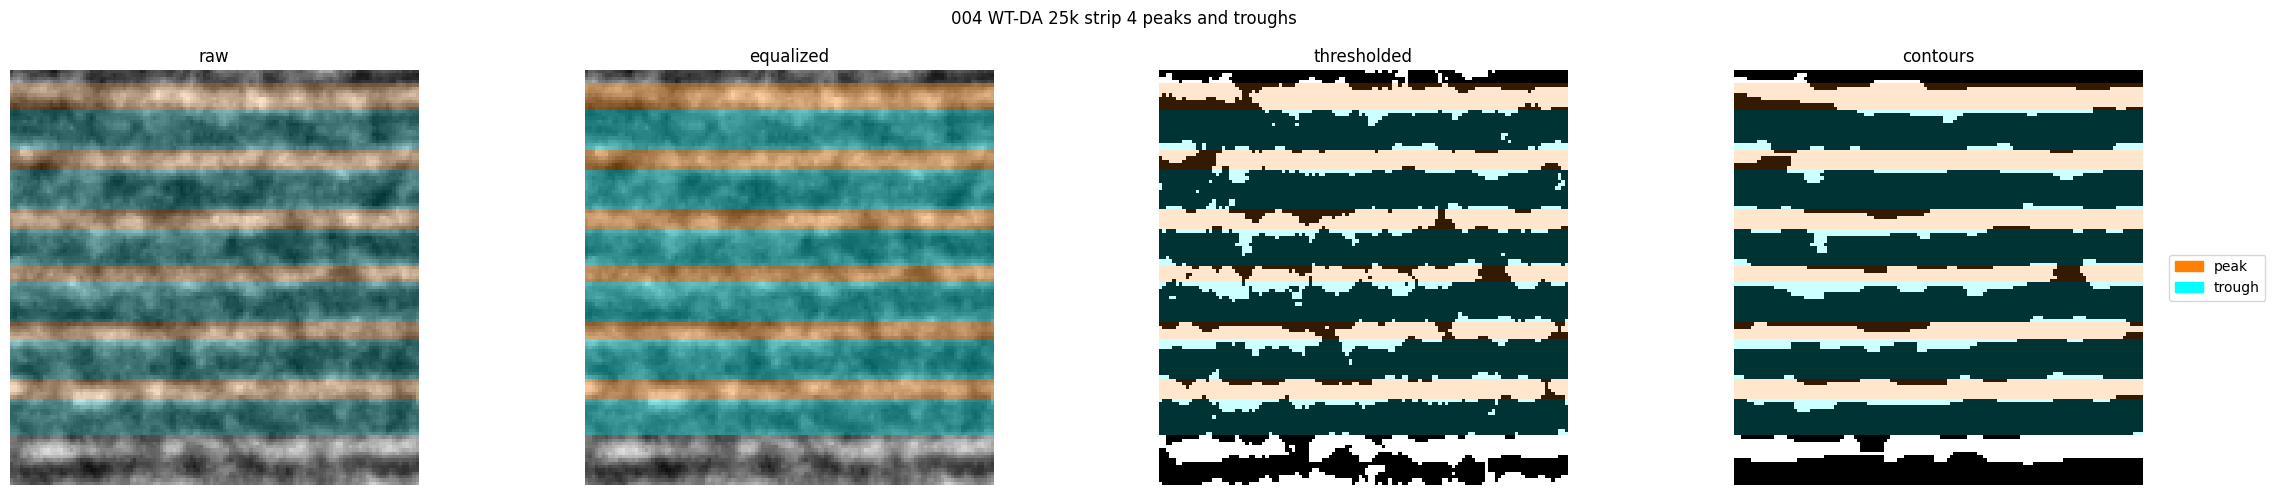

./output/trial_0/data/004 WT-DA 25k strip 1_data.csv
fig_height: 4.04
image y = 101, image x = 76
top_y: 6, bottom_y: 11
top_y: 19, bottom_y: 25
top_y: 33, bottom_y: 39
top_y: 48, bottom_y: 54
top_y: 63, bottom_y: 70
top_y: 78, bottom_y: 84
top_y: 11, bottom_y: 19
top_y: 25, bottom_y: 33
top_y: 39, bottom_y: 48
top_y: 54, bottom_y: 63
top_y: 70, bottom_y: 78
top_y: 84, bottom_y: 92
image y = 101, image x = 76
top_y: 6, bottom_y: 11
top_y: 19, bottom_y: 25
top_y: 33, bottom_y: 39
top_y: 48, bottom_y: 54
top_y: 63, bottom_y: 70
top_y: 78, bottom_y: 84
top_y: 11, bottom_y: 19
top_y: 25, bottom_y: 33
top_y: 39, bottom_y: 48
top_y: 54, bottom_y: 63
top_y: 70, bottom_y: 78
top_y: 84, bottom_y: 92
image y = 101, image x = 76
top_y: 6, bottom_y: 11
top_y: 19, bottom_y: 25
top_y: 33, bottom_y: 39
top_y: 48, bottom_y: 54
top_y: 63, bottom_y: 70
top_y: 78, bottom_y: 84
top_y: 11, bottom_y: 19
top_y: 25, bottom_y: 33
top_y: 39, bottom_y: 48
top_y: 54, bottom_y: 63
top_y: 70, bottom_y: 78
top_y: 84

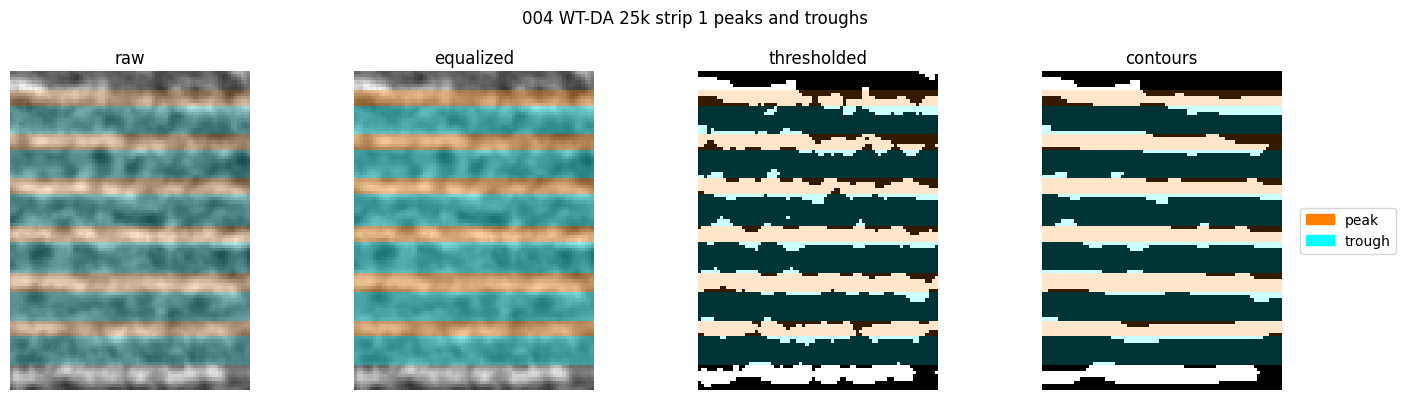

In [16]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

output_path = os.path.join(base_path, "fwhm_comparison")
data_path = os.path.join(base_path, "data")
line_alpha = 0.2
peak_color=(255, 128, 0)
trough_color=(0, 255, 255)

#create the directory if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

for image in image_paths:
    csv_path = f"{data_path}/{image}_data.csv"
    print(csv_path)
    
    # load as color images
    raw_image = load_rgb_image(image_paths[image]["raw"])
    equalized_image = load_rgb_image(image_paths[image]["equalized"])
    thresholded_image = load_rgb_image(image_paths[image]["thresholded"])
    contours_image = load_rgb_image(image_paths[image]["contours"])
    
    # calculate the size of the figure
    fig_width = raw_image.shape[1] / 5
    fig_height = raw_image.shape[0] / 25
    print(f"fig_height: {fig_height}")
    # create a plot with subplots for all of the images so we can compare them
    fig, axs = plt.subplots(1, 4, figsize=(fig_width, fig_height))
    plt.subplots_adjust(top=0.85)  # Adjust the top of the figure to make room for the suptitle
    fig.suptitle(f"{image} peaks and troughs")
    

    raw_image = add_fwhm_boxes(raw_image, csv_path, peak_color=peak_color, trough_color=trough_color, alpha=line_alpha)
    axs[0].imshow(raw_image, cmap="gray")
    axs[0].set_title("raw")
    axs[0].axis("off")

    equalized_image = add_fwhm_boxes(raw_image, csv_path,peak_color=peak_color, trough_color=trough_color,  alpha=line_alpha)
    axs[1].imshow(equalized_image, cmap="gray")
    axs[1].set_title("equalized")
    axs[1].axis("off")

    thresholded_image = add_fwhm_boxes(thresholded_image, csv_path,peak_color=peak_color, trough_color=trough_color,  alpha=line_alpha)
    axs[2].imshow(thresholded_image, cmap="gray")
    axs[2].set_title("thresholded")
    axs[2].axis("off")

    contours_image = add_fwhm_boxes(contours_image, csv_path,peak_color=peak_color, trough_color=trough_color,  alpha=line_alpha)
    axs[3].imshow(contours_image, cmap="gray")
    axs[3].set_title("contours")
    axs[3].axis("off")

    # add a legend showing that the peak_color has a label "peak" and the trough_color has a label "trough"
    peak_patch = Patch(color=tuple(np.array(peak_color)/255), label='peak')
    trough_patch = Patch(color=tuple(np.array(trough_color)/255), label='trough')
    plt.legend(handles=[peak_patch, trough_patch], bbox_to_anchor=(1.05, 0.5), loc='center left')

    plt.tight_layout()
    # save it to the comparison2 folder
    plt.savefig(f"{output_path}/{image}.png")
    plt.show()
    


./output/trial_0/data/013 WT-DA-1 19k new sec strip 2_data.csv
fig_height: 4.24


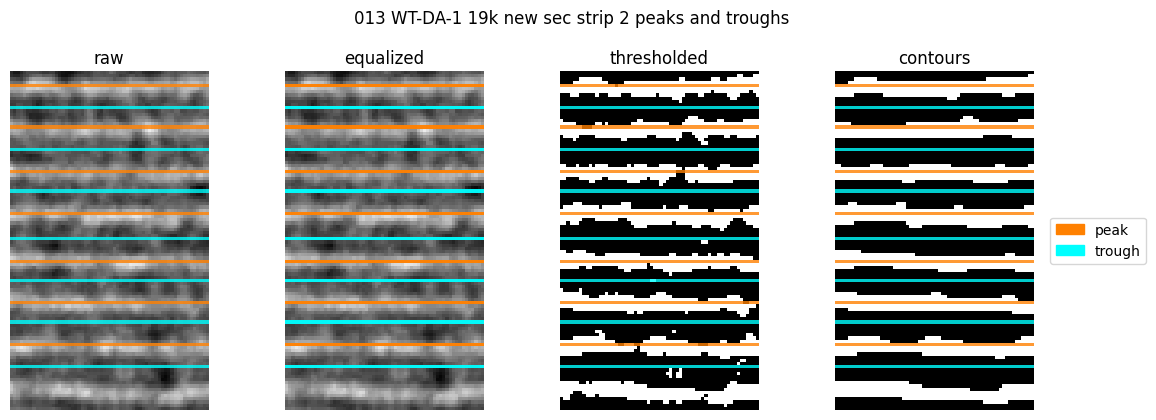

./output/trial_0/data/013 WT-DA-1 19k new sec strip 4_data.csv
fig_height: 4.24


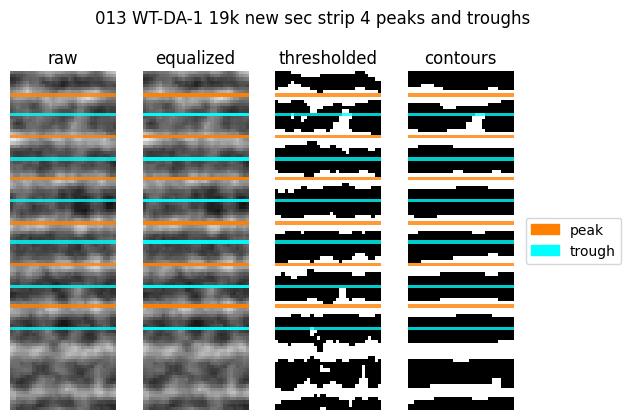

./output/trial_0/data/004 WT-DA 25k strip 2_data.csv
fig_height: 4.04


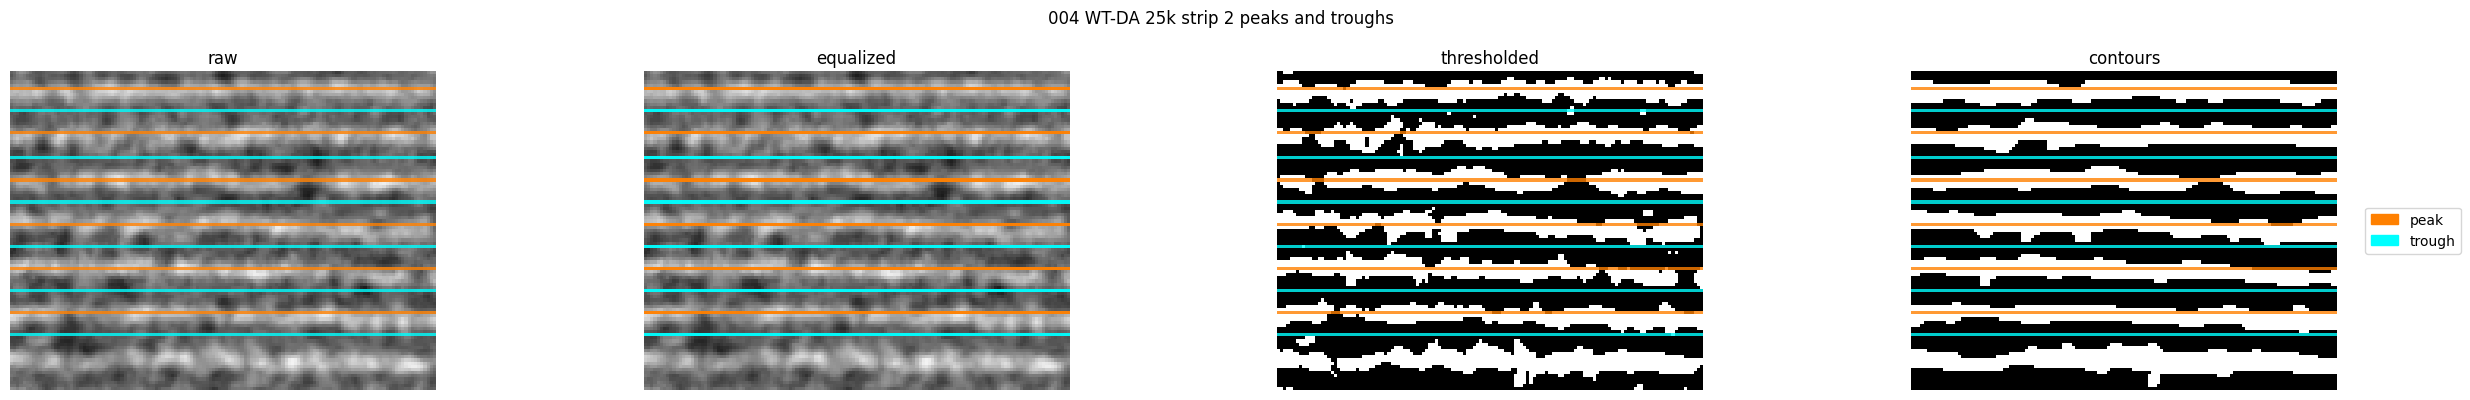

./output/trial_0/data/004 WT-DA 25k strip 5_data.csv
fig_height: 4.2


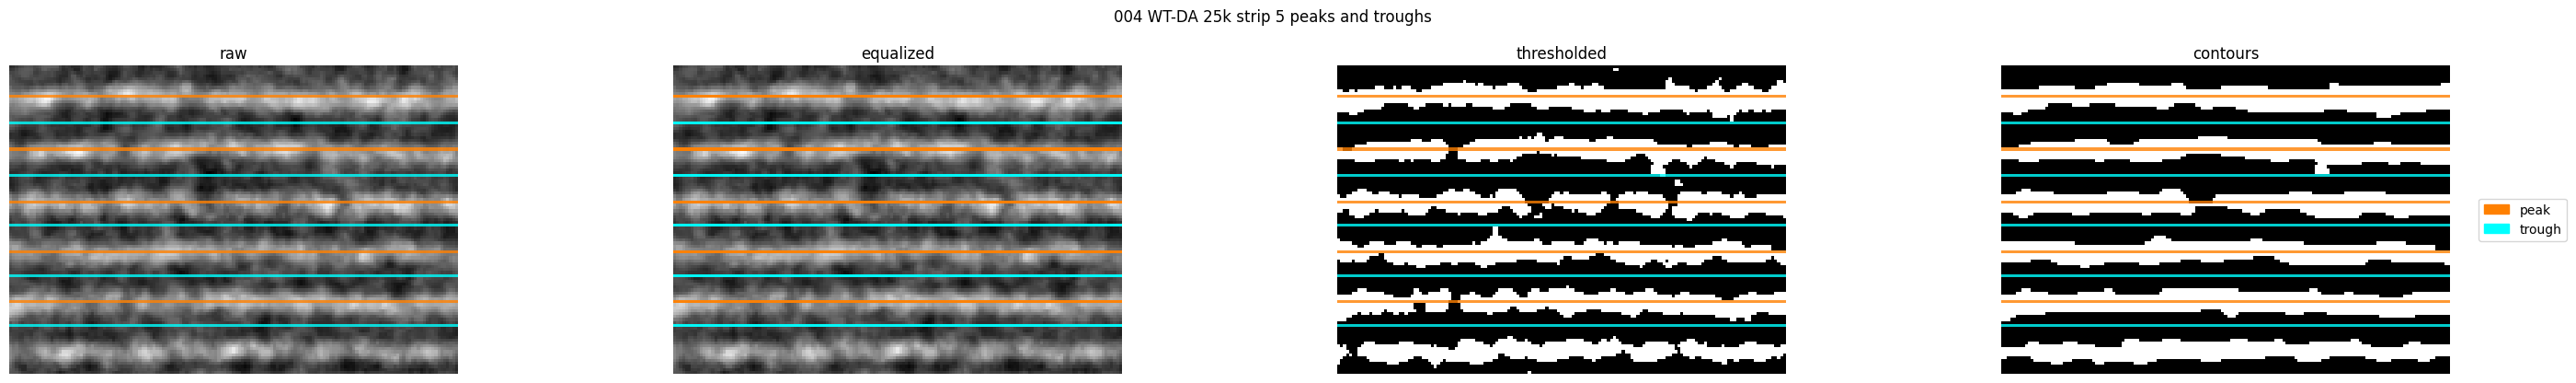

./output/trial_0/data/004 WT-DA 25k strip 3_data.csv
fig_height: 5.04


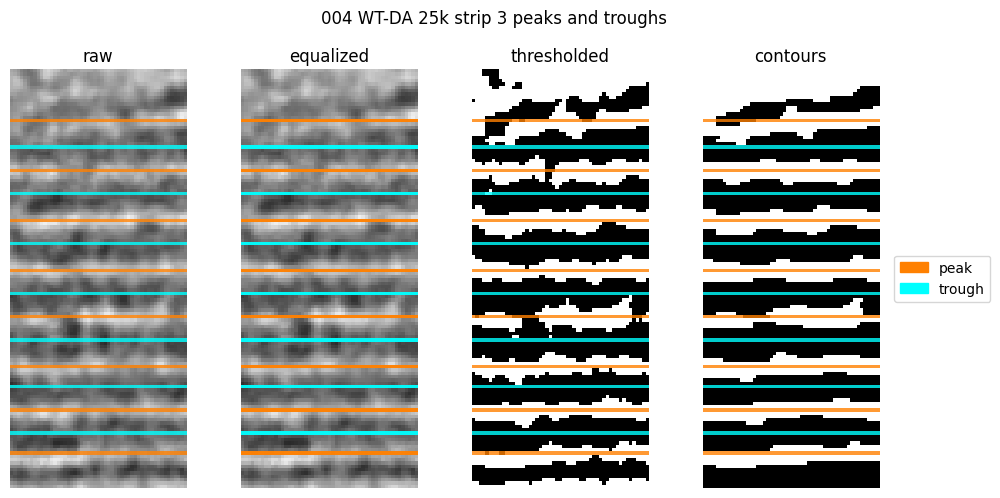

./output/trial_0/data/013 WT-DA-1 19k new sec strip 3_data.csv
fig_height: 4.24


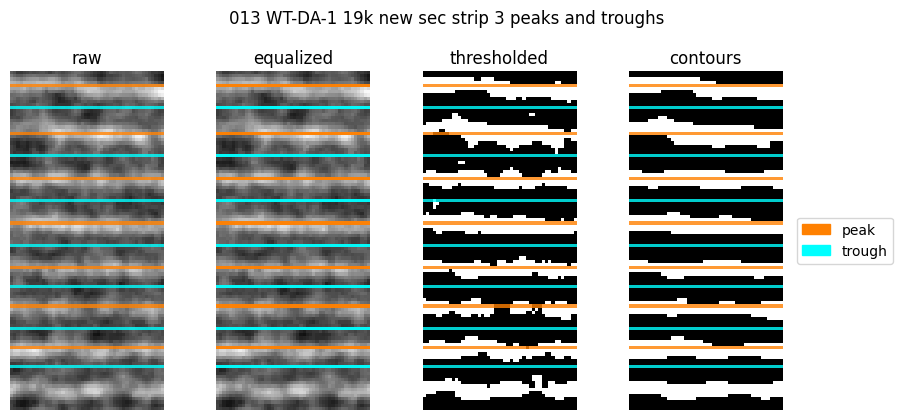

./output/trial_0/data/013 WT-DA-1 19k new sec strip 1_data.csv
fig_height: 5.88


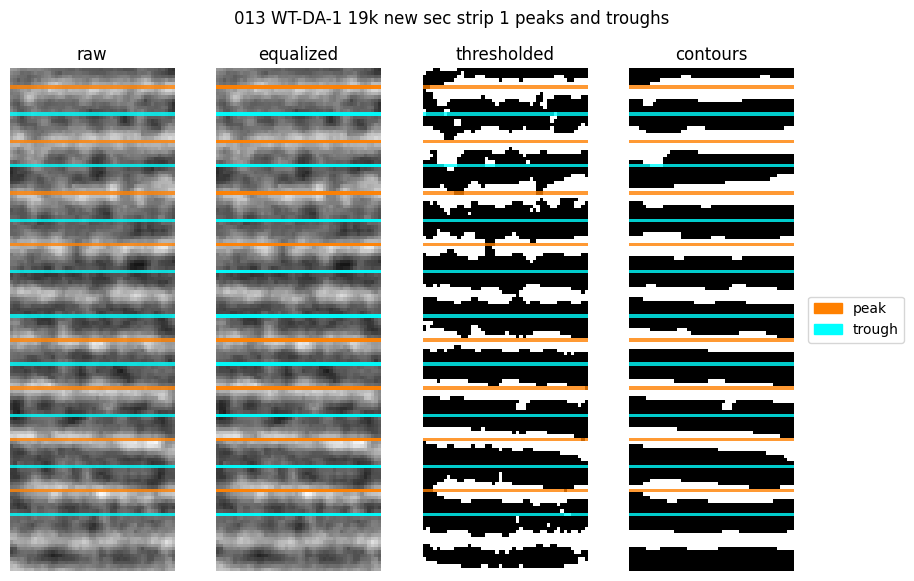

./output/trial_0/data/004 WT-DA 25k strip 4_data.csv
fig_height: 5.0


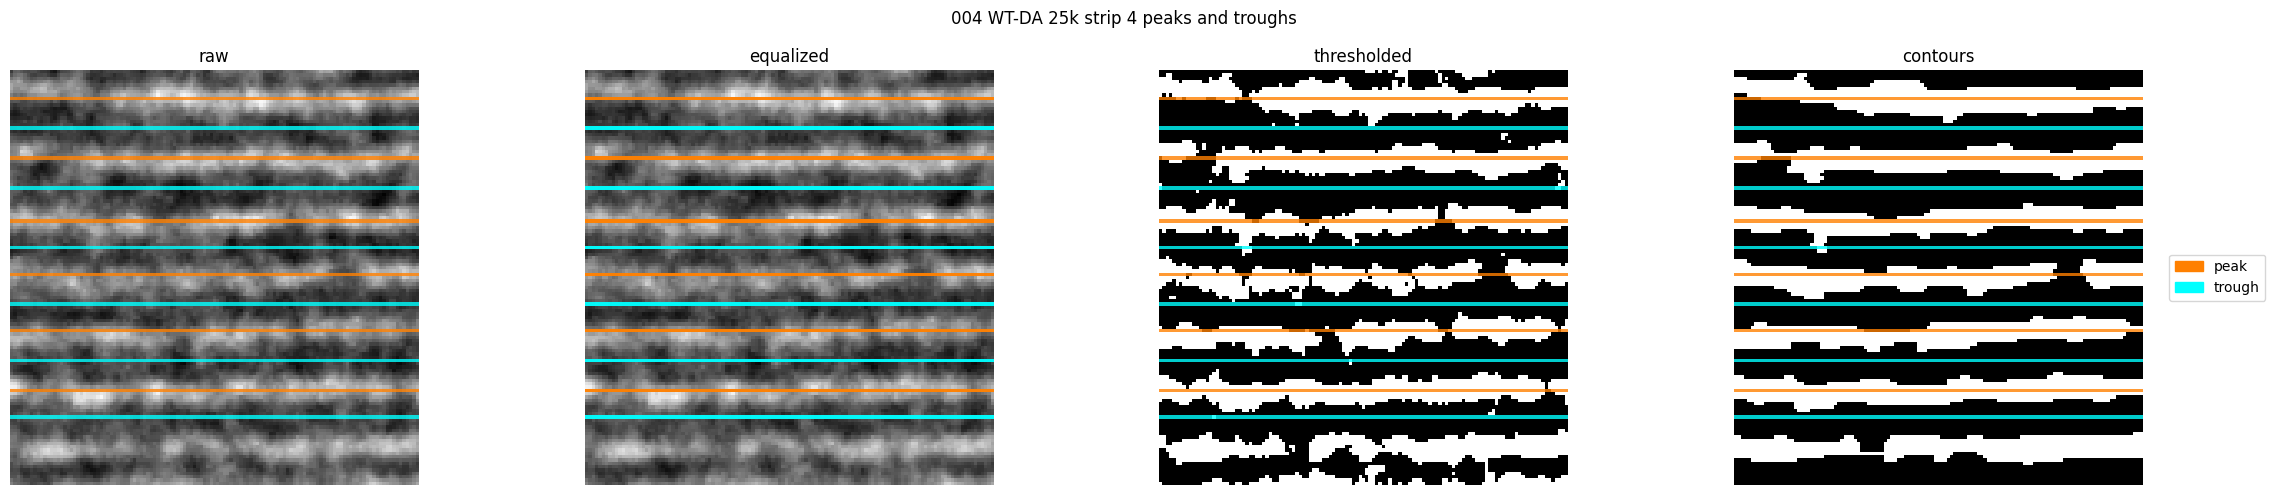

./output/trial_0/data/004 WT-DA 25k strip 1_data.csv
fig_height: 4.04


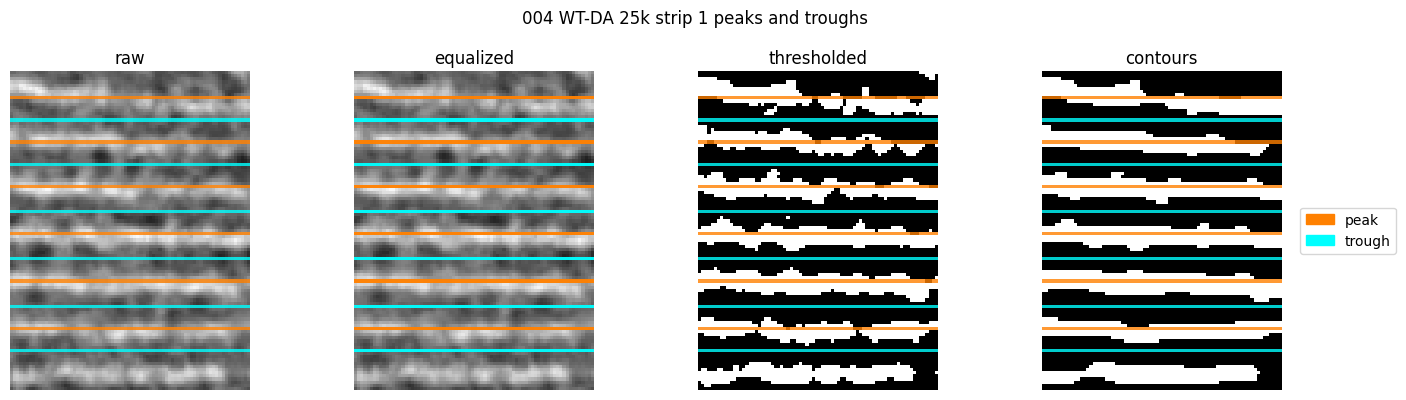

In [17]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

output_path = os.path.join(base_path, "comparison2")
data_path = os.path.join(base_path, "data")
line_alpha = 0.8
line_width = 1
peak_color=(255, 128, 0)
trough_color=(0, 255, 255)

#create the directory if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

for image in image_paths:
    csv_path = f"{data_path}/{image}_data.csv"
    print(csv_path)
    
    # load as color images
    raw_image = load_rgb_image(image_paths[image]["raw"])
    equalized_image = load_rgb_image(image_paths[image]["equalized"])
    thresholded_image = load_rgb_image(image_paths[image]["thresholded"])
    contours_image = load_rgb_image(image_paths[image]["contours"])
    overlay_image = load_rgb_image(image_paths[image]["overlay"])
    
    # calculate the size of the figure
    fig_width = raw_image.shape[1] / 5
    fig_height = raw_image.shape[0] / 25
    print(f"fig_height: {fig_height}")
    # create a plot with subplots for all of the images so we can compare them
    fig, axs = plt.subplots(1, 4, figsize=(fig_width, fig_height))
    plt.subplots_adjust(top=0.85)  # Adjust the top of the figure to make room for the suptitle
    fig.suptitle(f"{image} peaks and troughs")
    

    raw_image = add_horizontal_peak_trough_lines(raw_image, csv_path, peak_color=peak_color, trough_color=trough_color, alpha=line_alpha, width=line_width)
    axs[0].imshow(raw_image, cmap="gray")
    axs[0].set_title("raw")
    axs[0].axis("off")

    equalized_image = add_horizontal_peak_trough_lines(raw_image, csv_path,peak_color=peak_color, trough_color=trough_color,  alpha=line_alpha, width=line_width)
    axs[1].imshow(equalized_image, cmap="gray")
    axs[1].set_title("equalized")
    axs[1].axis("off")

    thresholded_image = add_horizontal_peak_trough_lines(thresholded_image, csv_path,peak_color=peak_color, trough_color=trough_color,  alpha=line_alpha, width=line_width)
    axs[2].imshow(thresholded_image, cmap="gray")
    axs[2].set_title("thresholded")
    axs[2].axis("off")

    contours_image = add_horizontal_peak_trough_lines(contours_image, csv_path,peak_color=peak_color, trough_color=trough_color,  alpha=line_alpha, width=line_width)
    axs[3].imshow(contours_image, cmap="gray")
    axs[3].set_title("contours")
    axs[3].axis("off")

    # add a legend showing that the peak_color has a label "peak" and the trough_color has a label "trough"
    peak_patch = Patch(color=tuple(np.array(peak_color)/255), label='peak')
    trough_patch = Patch(color=tuple(np.array(trough_color)/255), label='trough')
    plt.legend(handles=[peak_patch, trough_patch], bbox_to_anchor=(1.05, 0.5), loc='center left')

    plt.tight_layout()
    # save it to the comparison2 folder
    plt.savefig(f"{output_path}/{image}.png")
    plt.show()
    


In [18]:
# chosen_height = 0.5 # FWHM height, as a fraction of the peak height. 0.5 is the default

# images = glob.glob(f"./output/strips/*.png")
# hist_data = [process_image(image) for image in images]


In [19]:
# # what do the various results [i] mean?
# # results[0] = widths
# # results[1] = peak_heights
# # results[2] = left_bases
# # results[3] = right_bases

# # convert the peaks to a list for easier access
# peak_list = peaks.tolist()

# # plot the bare histogram
# plt.figure(figsize=(10, 5))
# plt.title("Histogram")
# plt.plot(histogram)

# # plot the histogram again, and this time put a vertical line at the left base and the 
# # right base of each of the peaks, and a centerline
# plt.plot(peaks, histogram[peaks], "x", figure=plt.figure(figsize=(10, 5)))
# for i, peak in enumerate(peak_list):

#     width = results[0][i]
#     peak_height = results[1][i]
#     fwheight = results[1][i]
#     left_base = results[2][i]
#     right_base = results[3][i]
#     center = left_base + ((right_base - left_base) / 2)

#     print(f"Peak {i}:")
#     print(f"Peak height: {peak_height}")
#     print(f"FWHeight: {fwheight:.2f}")
#     print(f"Width: {width:.2f}")
#     print(f"Left base: {left_base:.2f}")
#     print(f"Right base: {right_base:.2f}")
#     print(f"Center: {center:.2f}")
#     print("\n")

#     plt.axvline(x=results[2][i], color='r')
#     plt.axvline(x=results[3][i], color='r')
    
#     results = peak_widths(histogram, peaks, rel_height=chosen_height)
#     plt.hlines(*results[1:], color="C2")

#     # calculate the center of the full-width at half-maximum
#     # center = results[3][i] - int((results[3][i] - results[2][i]) // 2)
#     plt.axvline(x=center, color='cyan')
#     # plot a dot at the (center, *results[1:])
#     plt.plot(center, results[1][i], "o")

# plt.plot(histogram)
# # plt.plot(peaks,[0, 0, 0, 0, 0, 0, 0, 0], "x") # peaks is the x axis, so we need to plot the y axis at 0 to show the 'x' marker at the peak position at the bottom of the graph
# plt.show()


### Type 1:
013 WT-DA-1 19k new sec strip 2
Number of peaks: 8
Average distance between peaks: 13.57
Average peak height: 15810.00
Average peak width: 0.00
Peak_num 0: peak: 5, peak_height: 15810, width: 5.27, left base: 2.18, right base: 7.45, center: 4.82
Peak_num 1: peak: 18, peak_height: 15810, width: 5.16, left base: 15.26, right base: 20.43, center: 17.84
Peak_num 2: peak: 31, peak_height: 15810, width: 4.82, left base: 28.89, right base: 33.70, center: 31.30
Peak_num 3: peak: 44, peak_height: 15810, width: 5.56, left base: 42.00, right base: 47.56, center: 44.78
Peak_num 4: peak: 59, peak_height: 15810, width: 5.00, left base: 56.69, right base: 61.69, center: 59.19
Peak_num 5: peak: 72, peak_height: 15810, width: 4.95, left base: 69.72, right base: 74.67, center: 72.20
Peak_num 6: peak: 86, peak_height: 15810, width: 5.09, left base: 83.22, right base: 88.32, center: 85.77
Peak_num 7: peak: 100, peak_height: 15810, width: 4.81, left base: 97.53, right base: 102.34, center: 99.94

In [20]:

# for data in hist_data:
#     display_histogram(data)
#     plt.show()
                    
                    
# data = hist_data[0]
# peak_list = data["hist_results"]["peaks"].tolist()
# histogram = data["hist_results"]["histogram"]
# peak_results = data["peak_results"]

# # plot the bare histogram
# plt.figure(figsize=(10, 5))
# plt.title("FWHM Histogram with peak")
# plt.plot(data["hist_results"]["histogram"])

# # plot the left base, right base and center for each peak
# for peak in peak_results:
#     plt.axvline(x=peak["left_base"], color='r')
#     plt.axvline(x=peak["right_base"], color='r')
#     plt.axvline(x=peak["center"], color='cyan')

In [21]:
# #get the contour image 
# contour_image_0 = get_processed_image(images[0], "contours")

# # get the shape of the image
# height, width = contour_image_0.shape
# print(f"Image shape: {height}x{width}")
# # given a contour image, we want to divide it into a given number of vertical strips.
# # to do this, we need to divide the width of the image by the number of strips we want
# # and then take the vertical subset of the image for each of those x value ranges
# num_strips = 10

# # the width of each strip is the width of the image divided by the number of strips, rounded down to the nearest integer
# strip_width = width // num_strips
# print(f"Strip width: {strip_width}")

# # for each image, we want to divide it into vertical strips, of a certain width. Then 
# # add that to a list of strips.

# strips = []

# for i in range(0, num_strips):

#     x = i * strip_width
#     print(f"Strip {x}:{x + strip_width}")
#     strip = contour_image_0[:, x:x+strip_width]
#     strips.append(strip)

# print(f"Number of strips: {len(strips)}")

# # Lets display each as a subplot in a single figure
# # create the base plot
# fig, axs = plt.subplots(1, num_strips, figsize=(5, 5))

# # for each strip, display it in a subplot
# for i, strip in enumerate(strips):
#     axs[i].imshow(strip, cmap='inferno')
#     axs[i].set_title(f"{i}", size=8)
#     axs[i].axis('off')
    
# plt.suptitle(f"num_strips={num_strips}, strip_width={strip_width}", size=12)
# plt.show()


In [22]:
# # for each strip in strips, we want to contours using cv2.findContours
# # we will then store the contours in a list of lists
# contours = []

# for strip in strips:
#     # find the contours in the strip
#     cnts, _ = cv2.findContours(strip, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     contours.append(cnts)
    
# # lets look at the coordinates for the first contour in the first strip
# print(contours[0][0])

# # can we get a centroid for the first contour in the first strip?
# M = cv2.moments(contours[0][0])

# # calculate x,y coordinate of center
# cX = int(M["m10"] / M["m00"])
# cY = int(M["m01"] / M["m00"])

# print(f"Centroid: {cX}, {cY}")